# **PRCP-1000-ProtugeseBank**

## Table of Contents
1. Domain Analysis
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Creation
5. Machine Learning Models:
  - Logistic Regression
  - Support Vector Machine
  - K-Nearest Neighbours (KNN)
  - Bagging (Logistic Regression)
  - Gradient Boosting
  - XGBoost
6. Model Performance Summary
7. Conclusion
8. Recommendation

**OBJECTIVE:**
- TThis project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

- By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.


# 1.DOMAIN ANALYSIS

A brief analysis of each column:

1. Age:This data represents the clients age. Important for understanding demographics and trends in banking decisions

2. job: Categorical data representing the type of occupation. Job type may influence a person’s financial stability and loan decisions.

3. marital: Categorical data on marital status. Marital status affects financial responsibilities and decision-making, especially regarding savings and investments.

4. education: Categorical data indicating education level. Higher education levels often correlate with better financial literacy and higher income.

5. default: Categorical data indicating if the client has defaulted on credit. Past credit behavior can indicate the risk of future financial decisions.

6. housing: Categorical data showing whether the client has a housing loan. Clients with housing loans may have different financial needs or constraints.

7. loan: Categorical data showing whether the client has a personal loan. Personal loans impact disposable income and financial risk.

8. contact: Categorical data on the communication type used (cellular or telephone). Communication channel effectiveness may vary based on client preference.

9. month: Categorical data representing the month of the last contact. Seasonal trends can influence customer decision-making.

10. day_of_week: Categorical data representing the day of the week of the last contact. Weekdays may impact client availability and responsiveness.

11. duration: Numeric data of the last contact duration in seconds. This directly influences the likelihood of client engagement, though not useful in predictive modeling due to its post-interaction nature.

12. campaign: Numeric data showing the number of contacts made during the current campaign. High contact frequency can lead to campaign fatigue or higher chances of conversion.

13. pdays: Numeric data showing days passed since last contact (999 means never contacted). Recent contact may increase awareness, influencing decision-making.

14. previous: Numeric data on the number of contacts before the current campaign. Frequent previous contacts may indicate persistent marketing efforts or a need to reconnect.

15. poutcome: Categorical data representing the outcome of the previous campaign. Positive outcomes in previous campaigns may indicate higher success chances.

16. emp.var.rate: Numeric data on employment variation rate. A macroeconomic indicator reflecting the general economic environment, affecting client confidence.

17. cons.price.idx: Numeric data of the consumer price index. Represents inflationary trends, influencing client purchasing power and financial decisions.

18. cons.conf.idx: Numeric data on consumer confidence. Indicates consumer sentiment about the economy, influencing their investment decisions.

19. euribor3m: Numeric data for the 3-month Euribor rate. This reflects interest rates and can affect borrowing and saving decisions.

20. nr.employed: Numeric data representing the number of employees in the economy. This gives insight into overall employment levels, influencing economic stability and consumer behavior.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the file
df = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [ ]:
# This feature helps read all the columns
pd.set_option('display.max_columns', None)

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### The dataset contains 41,188 observations, each representing a current customer contacted by the bank through phone calls. For every observation, 16 input variables are recorded, capturing both qualitative and quantitative attributes of the customer, including factors like age, occupation, housing and loan status, account balance, and the number of previous contacts. The dataset also includes a single binary output variable indicating the result of the phone calls, either "yes" or "no."

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
for i in df:
  if len(df[i].unique()) < 20:
    print(df[i].unique())
    print(i)
    print('----------------------------------------------')

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
job
----------------------------------------------
['married' 'single' 'divorced' 'unknown']
marital
----------------------------------------------
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
education
----------------------------------------------
['no' 'unknown' 'yes']
default
----------------------------------------------
['no' 'yes' 'unknown']
housing
----------------------------------------------
['no' 'yes' 'unknown']
loan
----------------------------------------------
['telephone' 'cellular']
contact
----------------------------------------------
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
month
----------------------------------------------
['mon' 'tue' 'wed' 'thu' 'fri']
day_of_week
----------------------------------------------
[0 1 2 3 4 5 

**Number of column having unique values less then 20**
1. Job
2. Marital
3. Education
4. Default
5. housing
6. loan
7. contact
8. month
9. day_of_week
10. previous
11. poutcome
12. emp.var.rate
13. nr.employed
14. y

In [ ]:
for i in df:
    if len(df[i].unique()) > 20:
      print(i)

age
duration
campaign
pdays
cons.price.idx
cons.conf.idx
euribor3m


**Columns having unique values more than 20**
1. Age
2. duration
3. campaign
4. pdays
5. cons.price.idx
6. cons.conf.idx
7. euribor3m

In [ ]:
# Rename the columns
df.rename({'cons.conf.idx' : 'conf_idx'},axis=1,inplace=True)
df.rename({'cons.price.idx' : 'price_idx'},axis=1,inplace=True)
df.rename({'emp.var.rate':'emp_var_rate'},axis=1,inplace=True)
df.rename({'nr.employed':'nr_employed'},axis=1,inplace=True)

In [ ]:
# check the column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'price_idx', 'conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,price_idx,conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
for i in df:
  if len(df[i].unique()) < 20:
    print(df[i].value_counts())
    print('--------------------------------')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
--------------------------------
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
--------------------------------
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
--------------------------------
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
--------------------------------
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
------------------

In [ ]:
df.campaign.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

In [ ]:
df.campaign.value_counts()

,count
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


# 3. Exploratory Data Analysis (EDA)

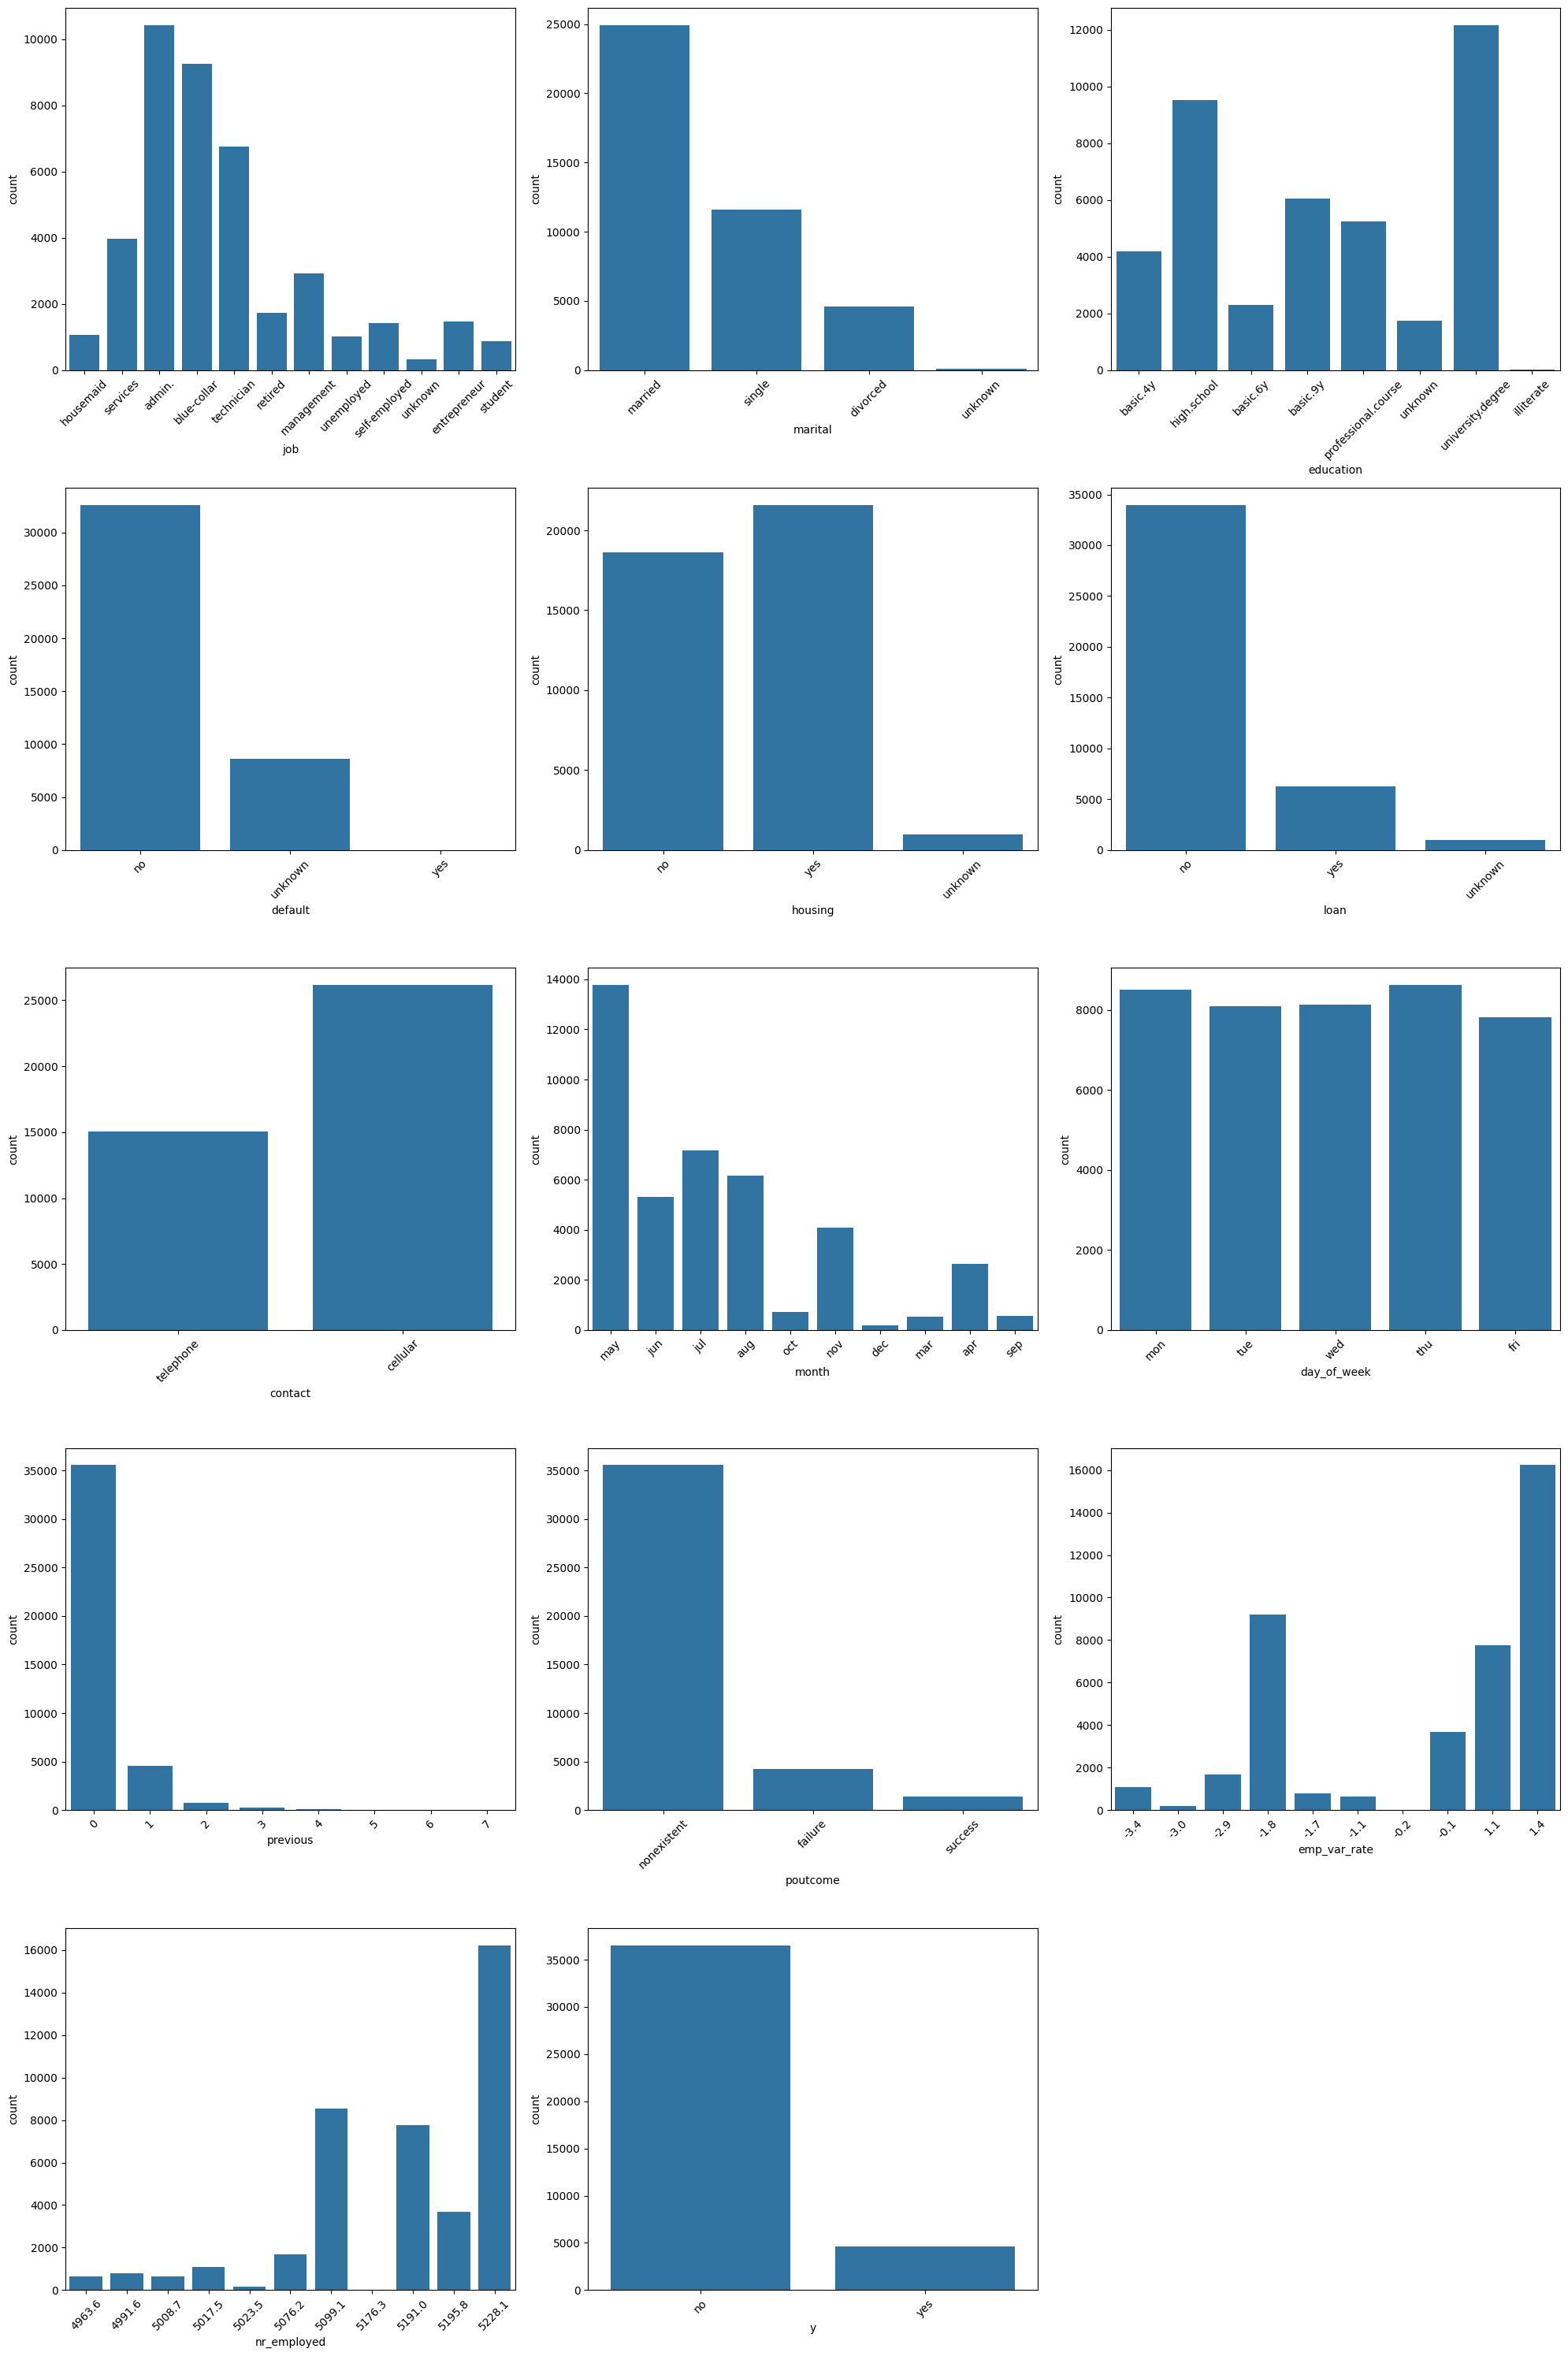

In [ ]:
# Plot countplot for the columns having values less than 20
plt.figure(figsize=(20,30))
plotnumber = 1
for i in df:
    if len(df[i].unique()) < 20:
        plt.subplot(5,3,plotnumber)
        plt.xticks(rotation = 45)
        sns.countplot(x = df[i])
        plotnumber += 1

plt.tight_layout()

#INSIGHTS

1. Job Distribution: The most common job roles are "admin." and "blue-collar", followed by "technician" and "services." There are fewer customers with roles like "student", "unemployed", and "entrepreneur."
2. Marital Status:
Most of the customers are married, followed by single individuals. A smaller portion is divorced, and "unknown" marital status is minimal.
3. Education:
The majority of the customers have "university.degree" education. Many also have "high.school" and "basic.9y" education levels. Very few have "illiterate" status.
4. Default Status:
Most customers do not have credit in default, with only a small portion having default status as "yes."
5. Housing Loan: A large number of customers have a housing loan ("yes"), while a comparable number do not. A small portion has an "unknown" housing loan status.
6. Personal Loan: Most customers do not have a personal loan, while a smaller group does.
7. Contact Type: Most contacts were made via "cellular" phone, while fewer interactions were through "telephone."
8. Month of Contact: May had the highest number of customer contacts, followed by August and July. Fewer contacts were made during December and March.
9. Day of the Week: Contacts were fairly evenly distributed across the days of the week, with no significant difference.
10. Previous Contact: The majority of customers had no previous contacts. A small portion had one or more previous contacts.
11. Outcome of Previous Marketing Campaign: Most customers had no previous marketing campaign outcome ("nonexistent"). Some had a "failure," and fewer experienced a "success."
12. Employment Variation Rate: Employment variation rate shows that most values are clustered around 1.1 and -1.1.
13. Outcome of Current Campaign (Binary Output): The vast majority of customers responded "no" to the campaign, with a smaller portion saying "yes." General Insights: The dataset appears to be unbalanced for several variables, such as the target variable (most customers said "no"). Certain job roles and months (like May) have significantly more data points than others, which could indicate where the focus was during the campaign.

<Axes: xlabel='campaign', ylabel='count'>

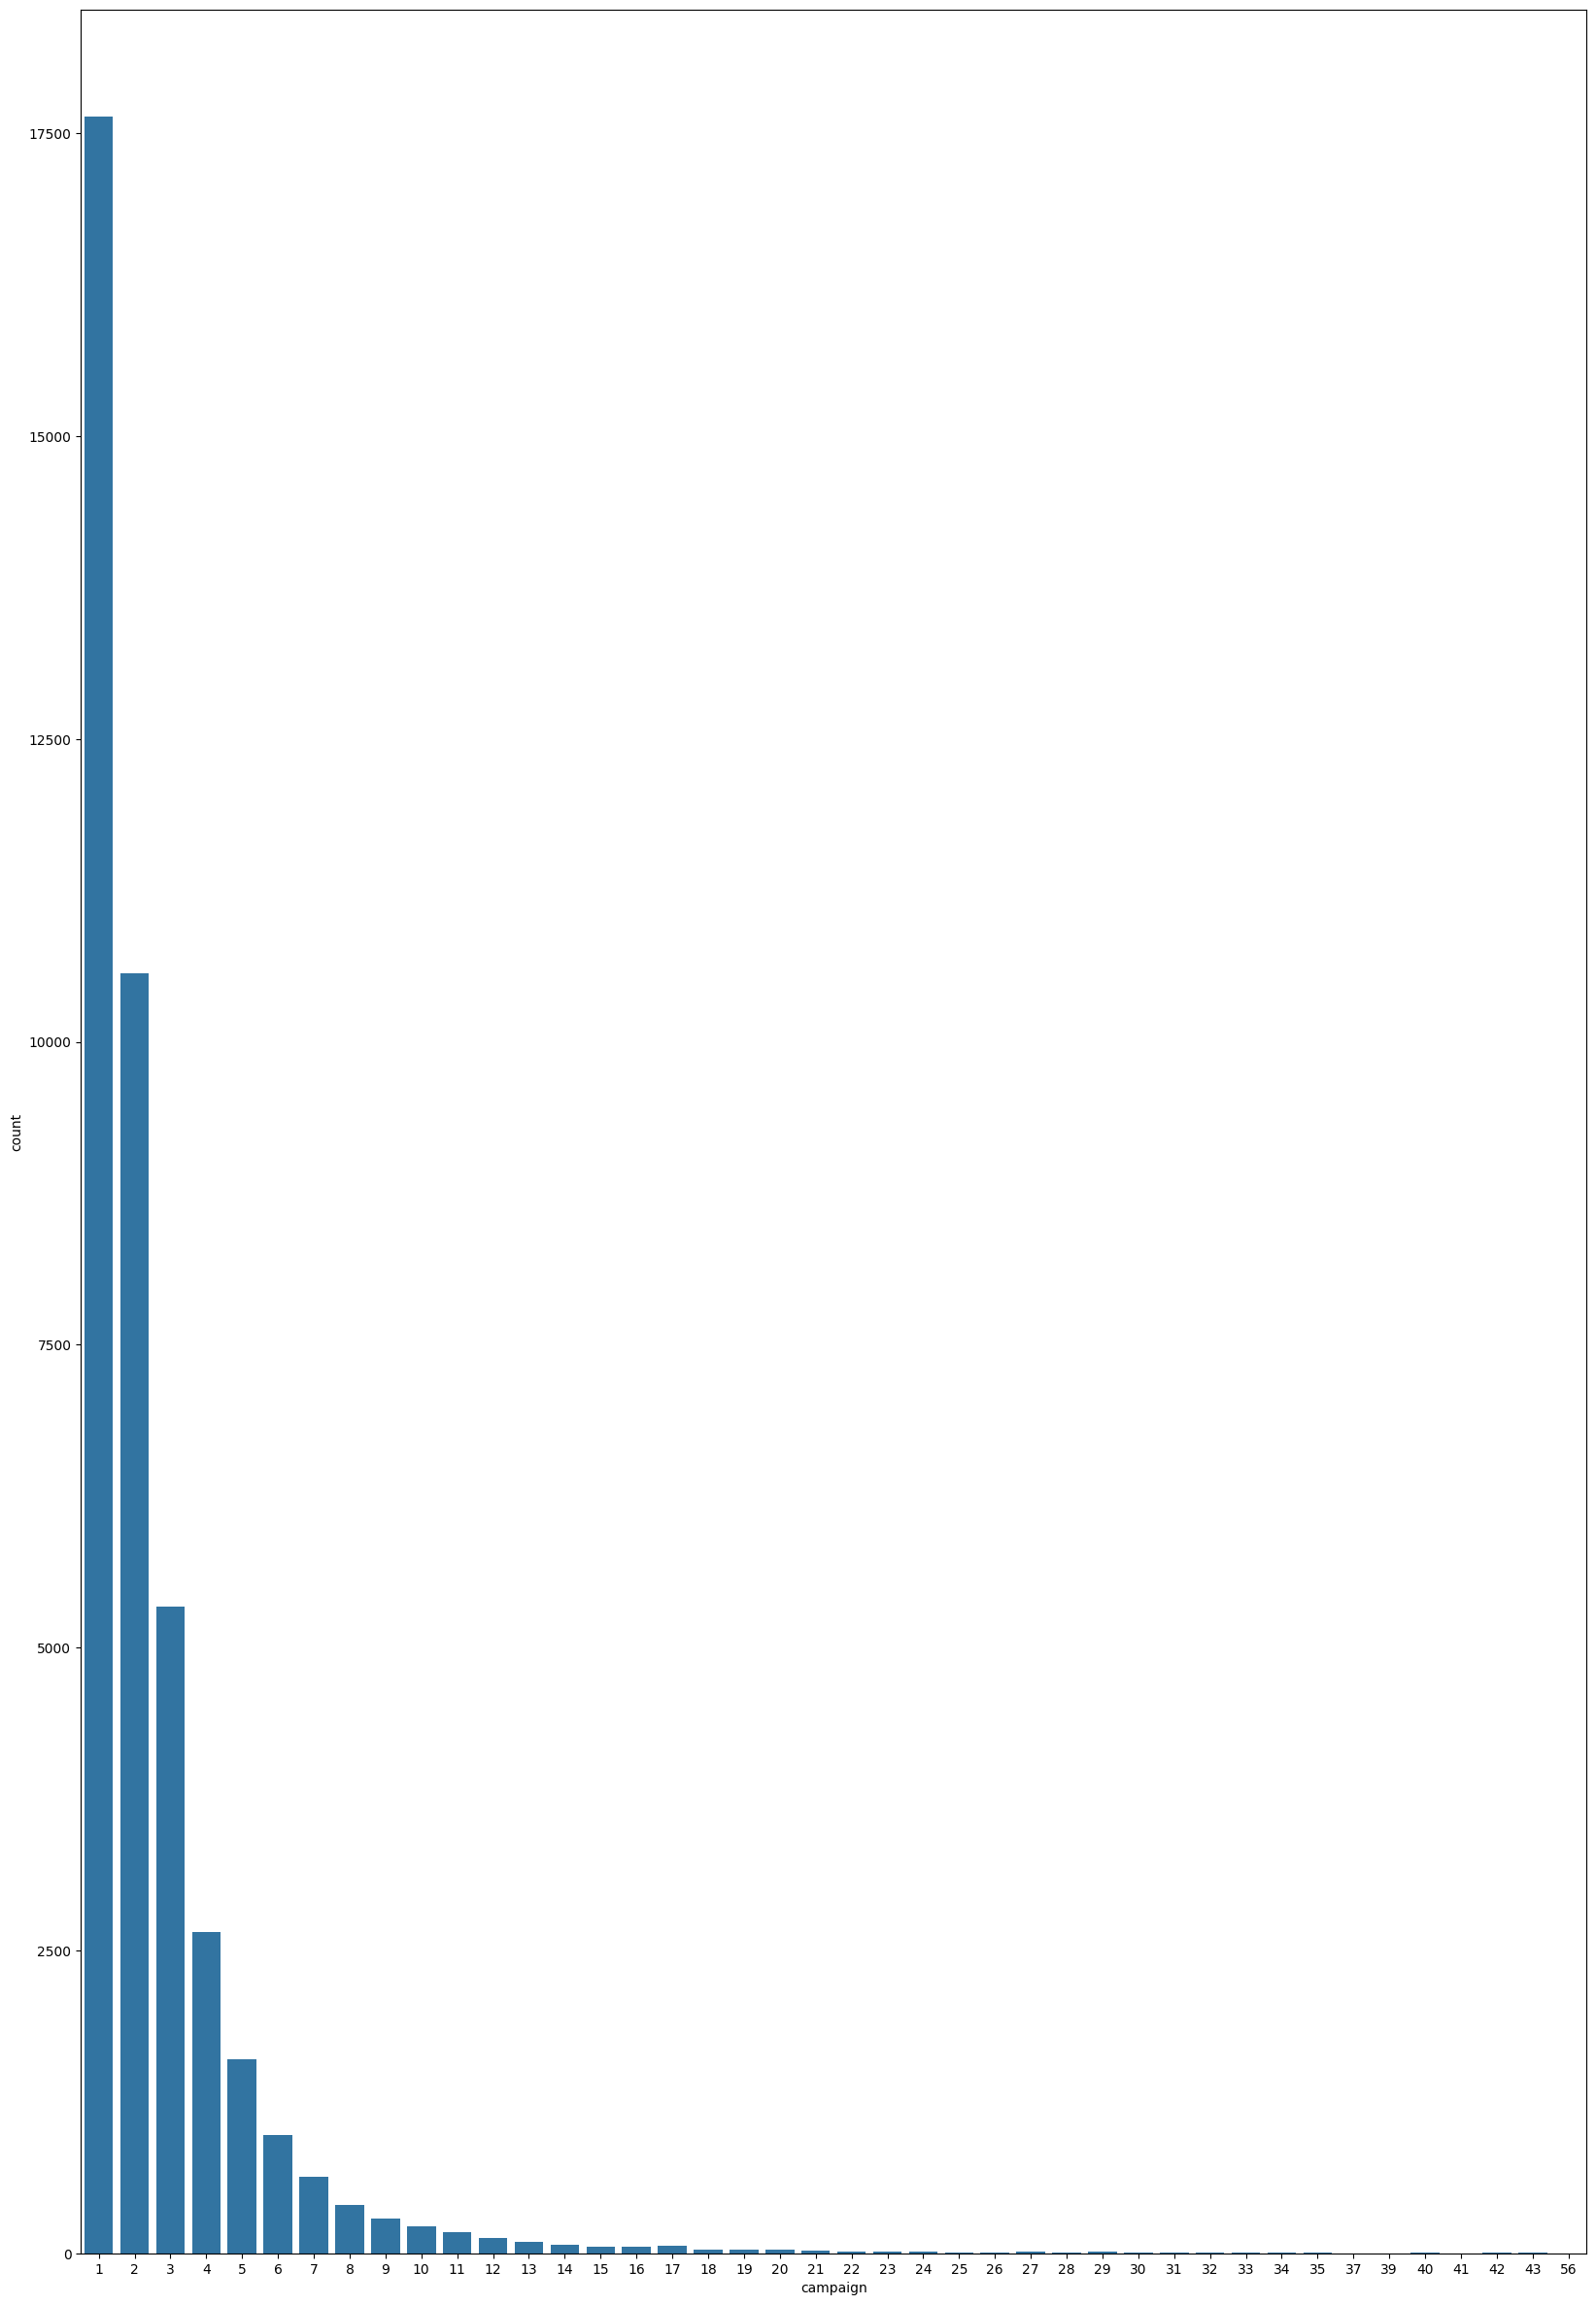

In [ ]:
plt.figure(figsize=(20,30))
sns.countplot(x = df.campaign)

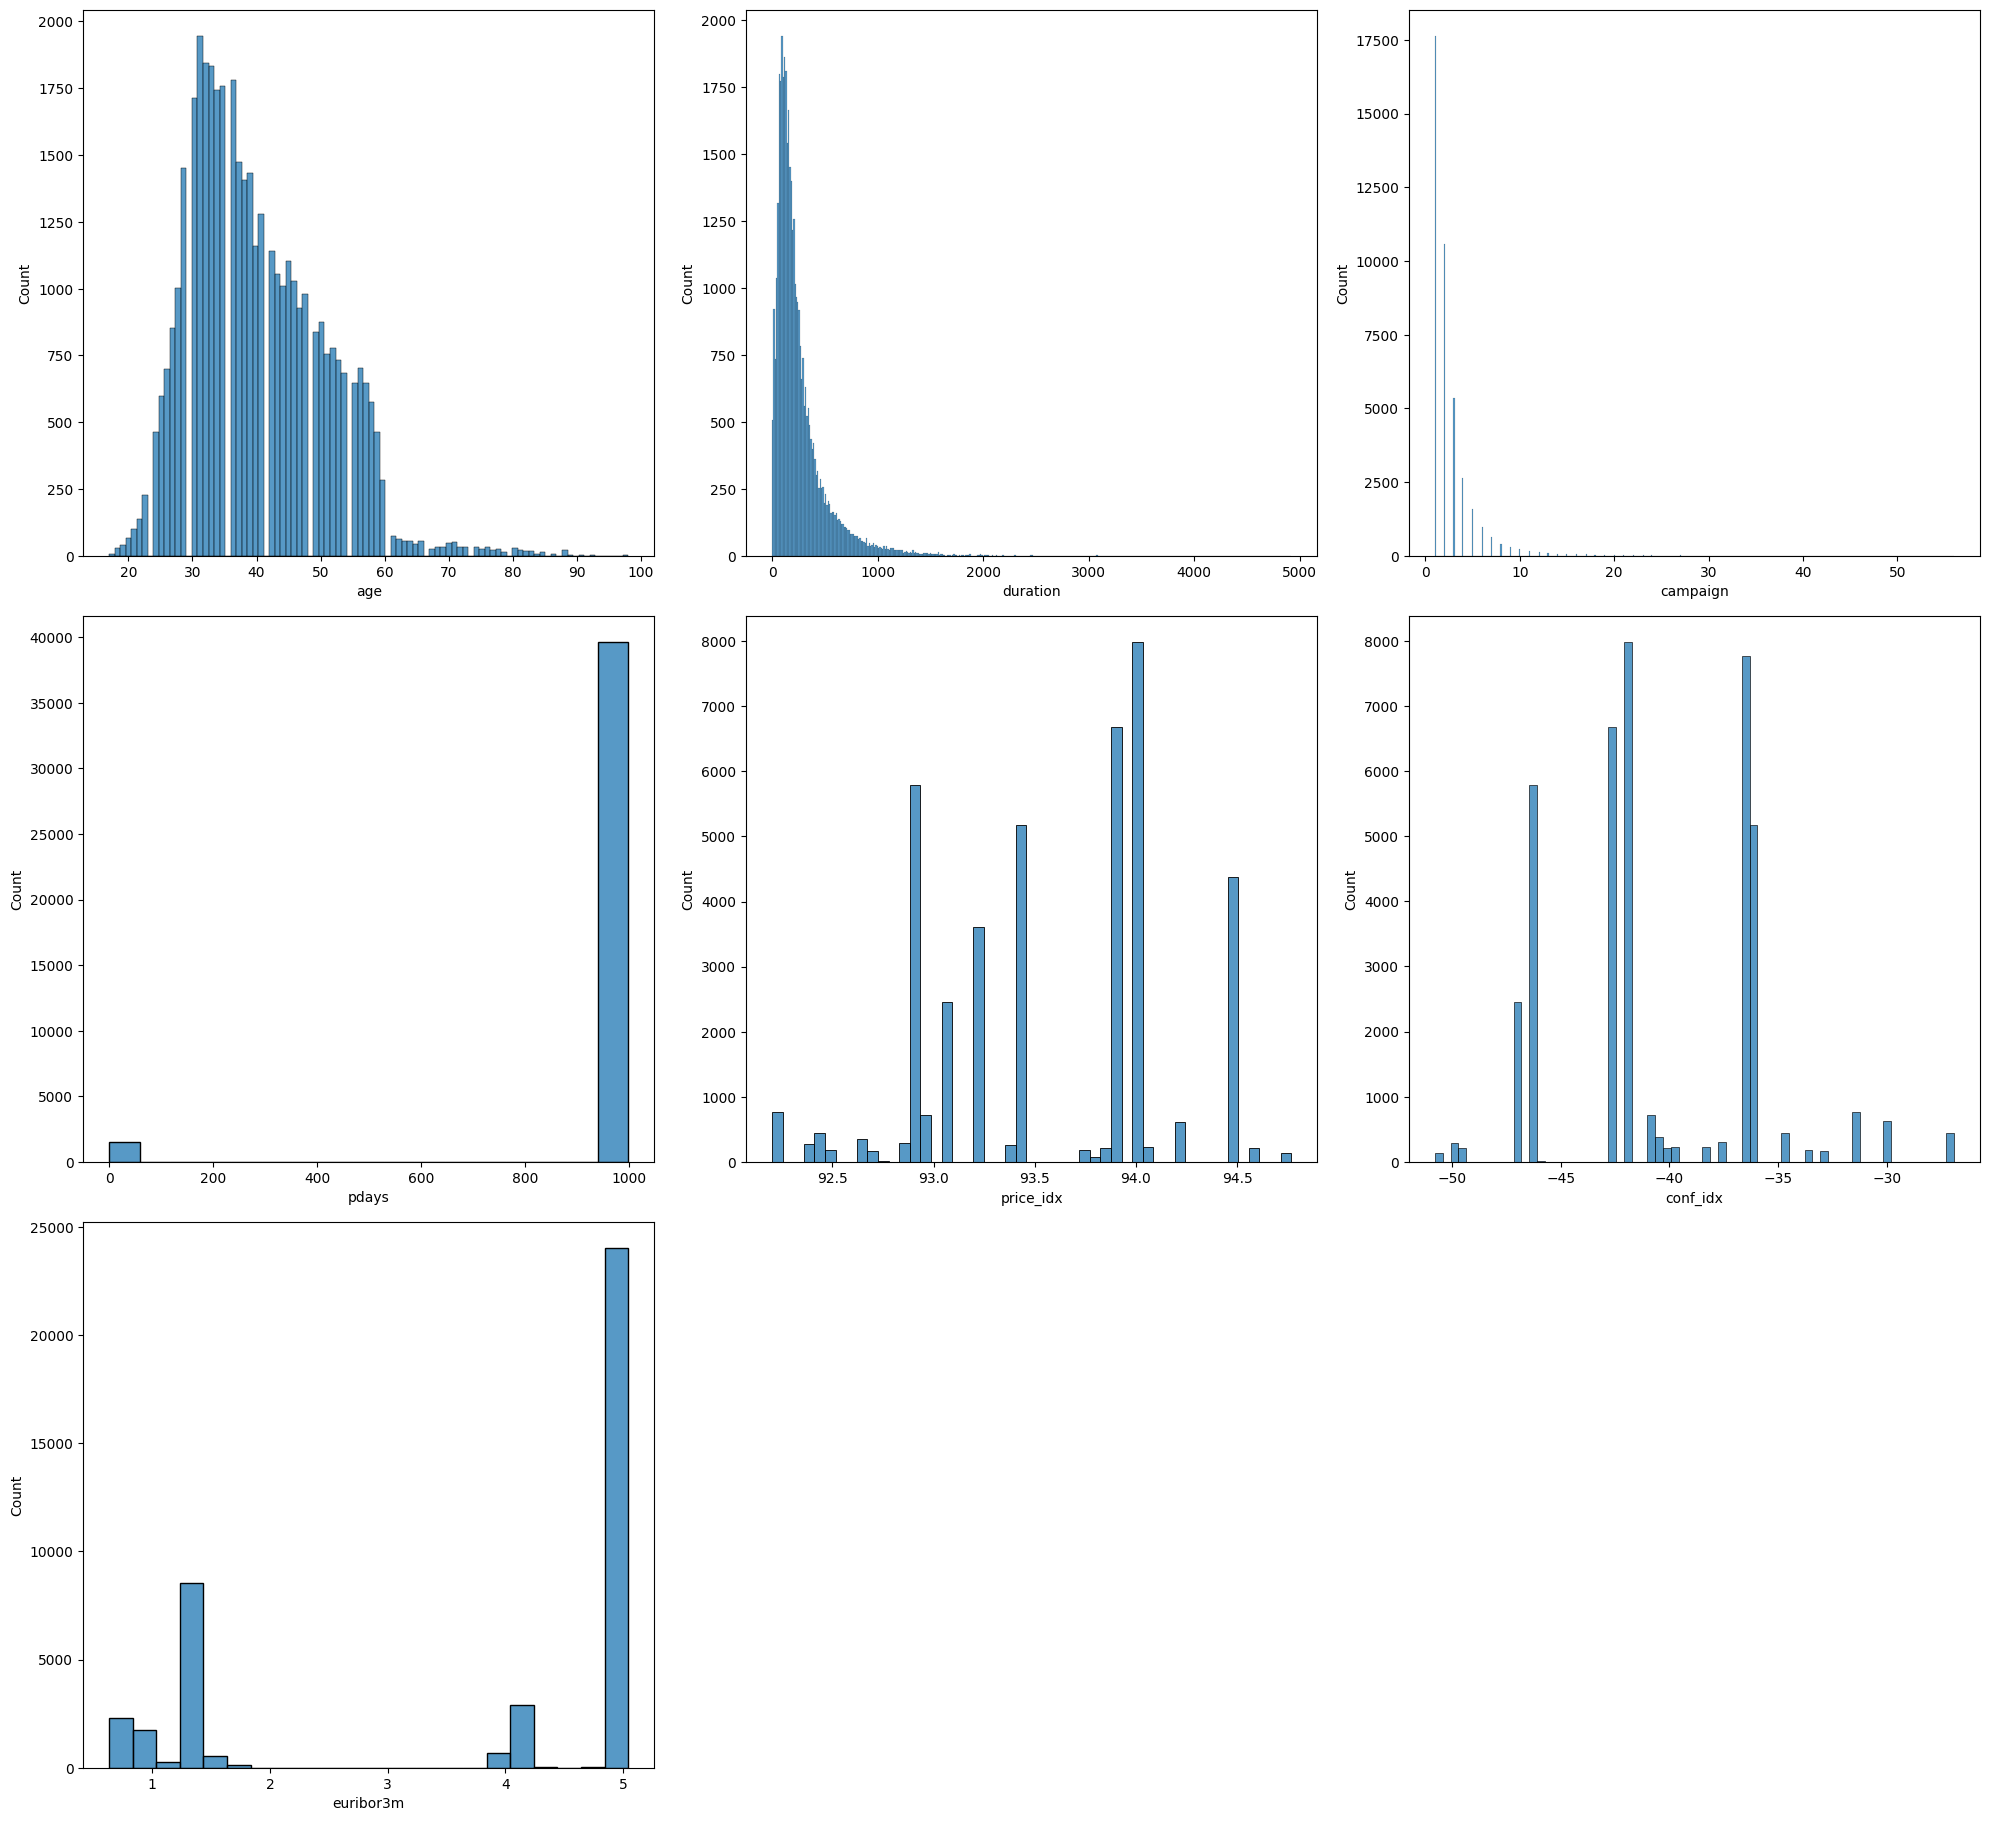

In [ ]:
# Plot the histplot for the columns having unique values > 20 (numeric columns)
plt.figure(figsize=(20,30))
plotnumber = 1
for i in df:
  if len(df[i].unique()) > 20 and (df[i].dtype == 'int64' or df[i].dtype == 'float64'):
    plt.subplot(5,3,plotnumber)
    sns.histplot(x = df[i])
    plotnumber += 1

plt.tight_layout()

<Axes: xlabel='pdays', ylabel='count'>

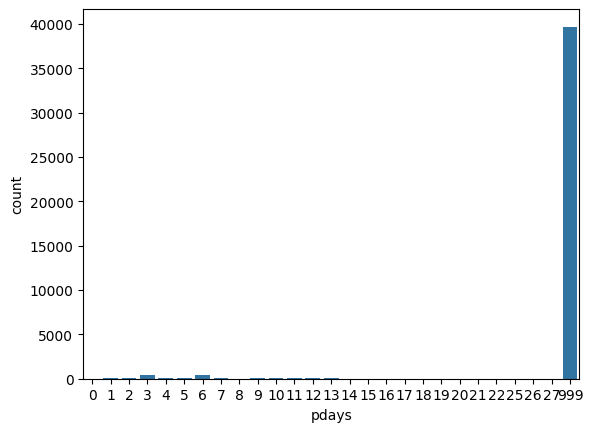

In [ ]:
sns.countplot(x = df.pdays)

In [ ]:
df.pdays.value_counts()

,count
pdays,
999,39673
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


###Bivarient Analysis

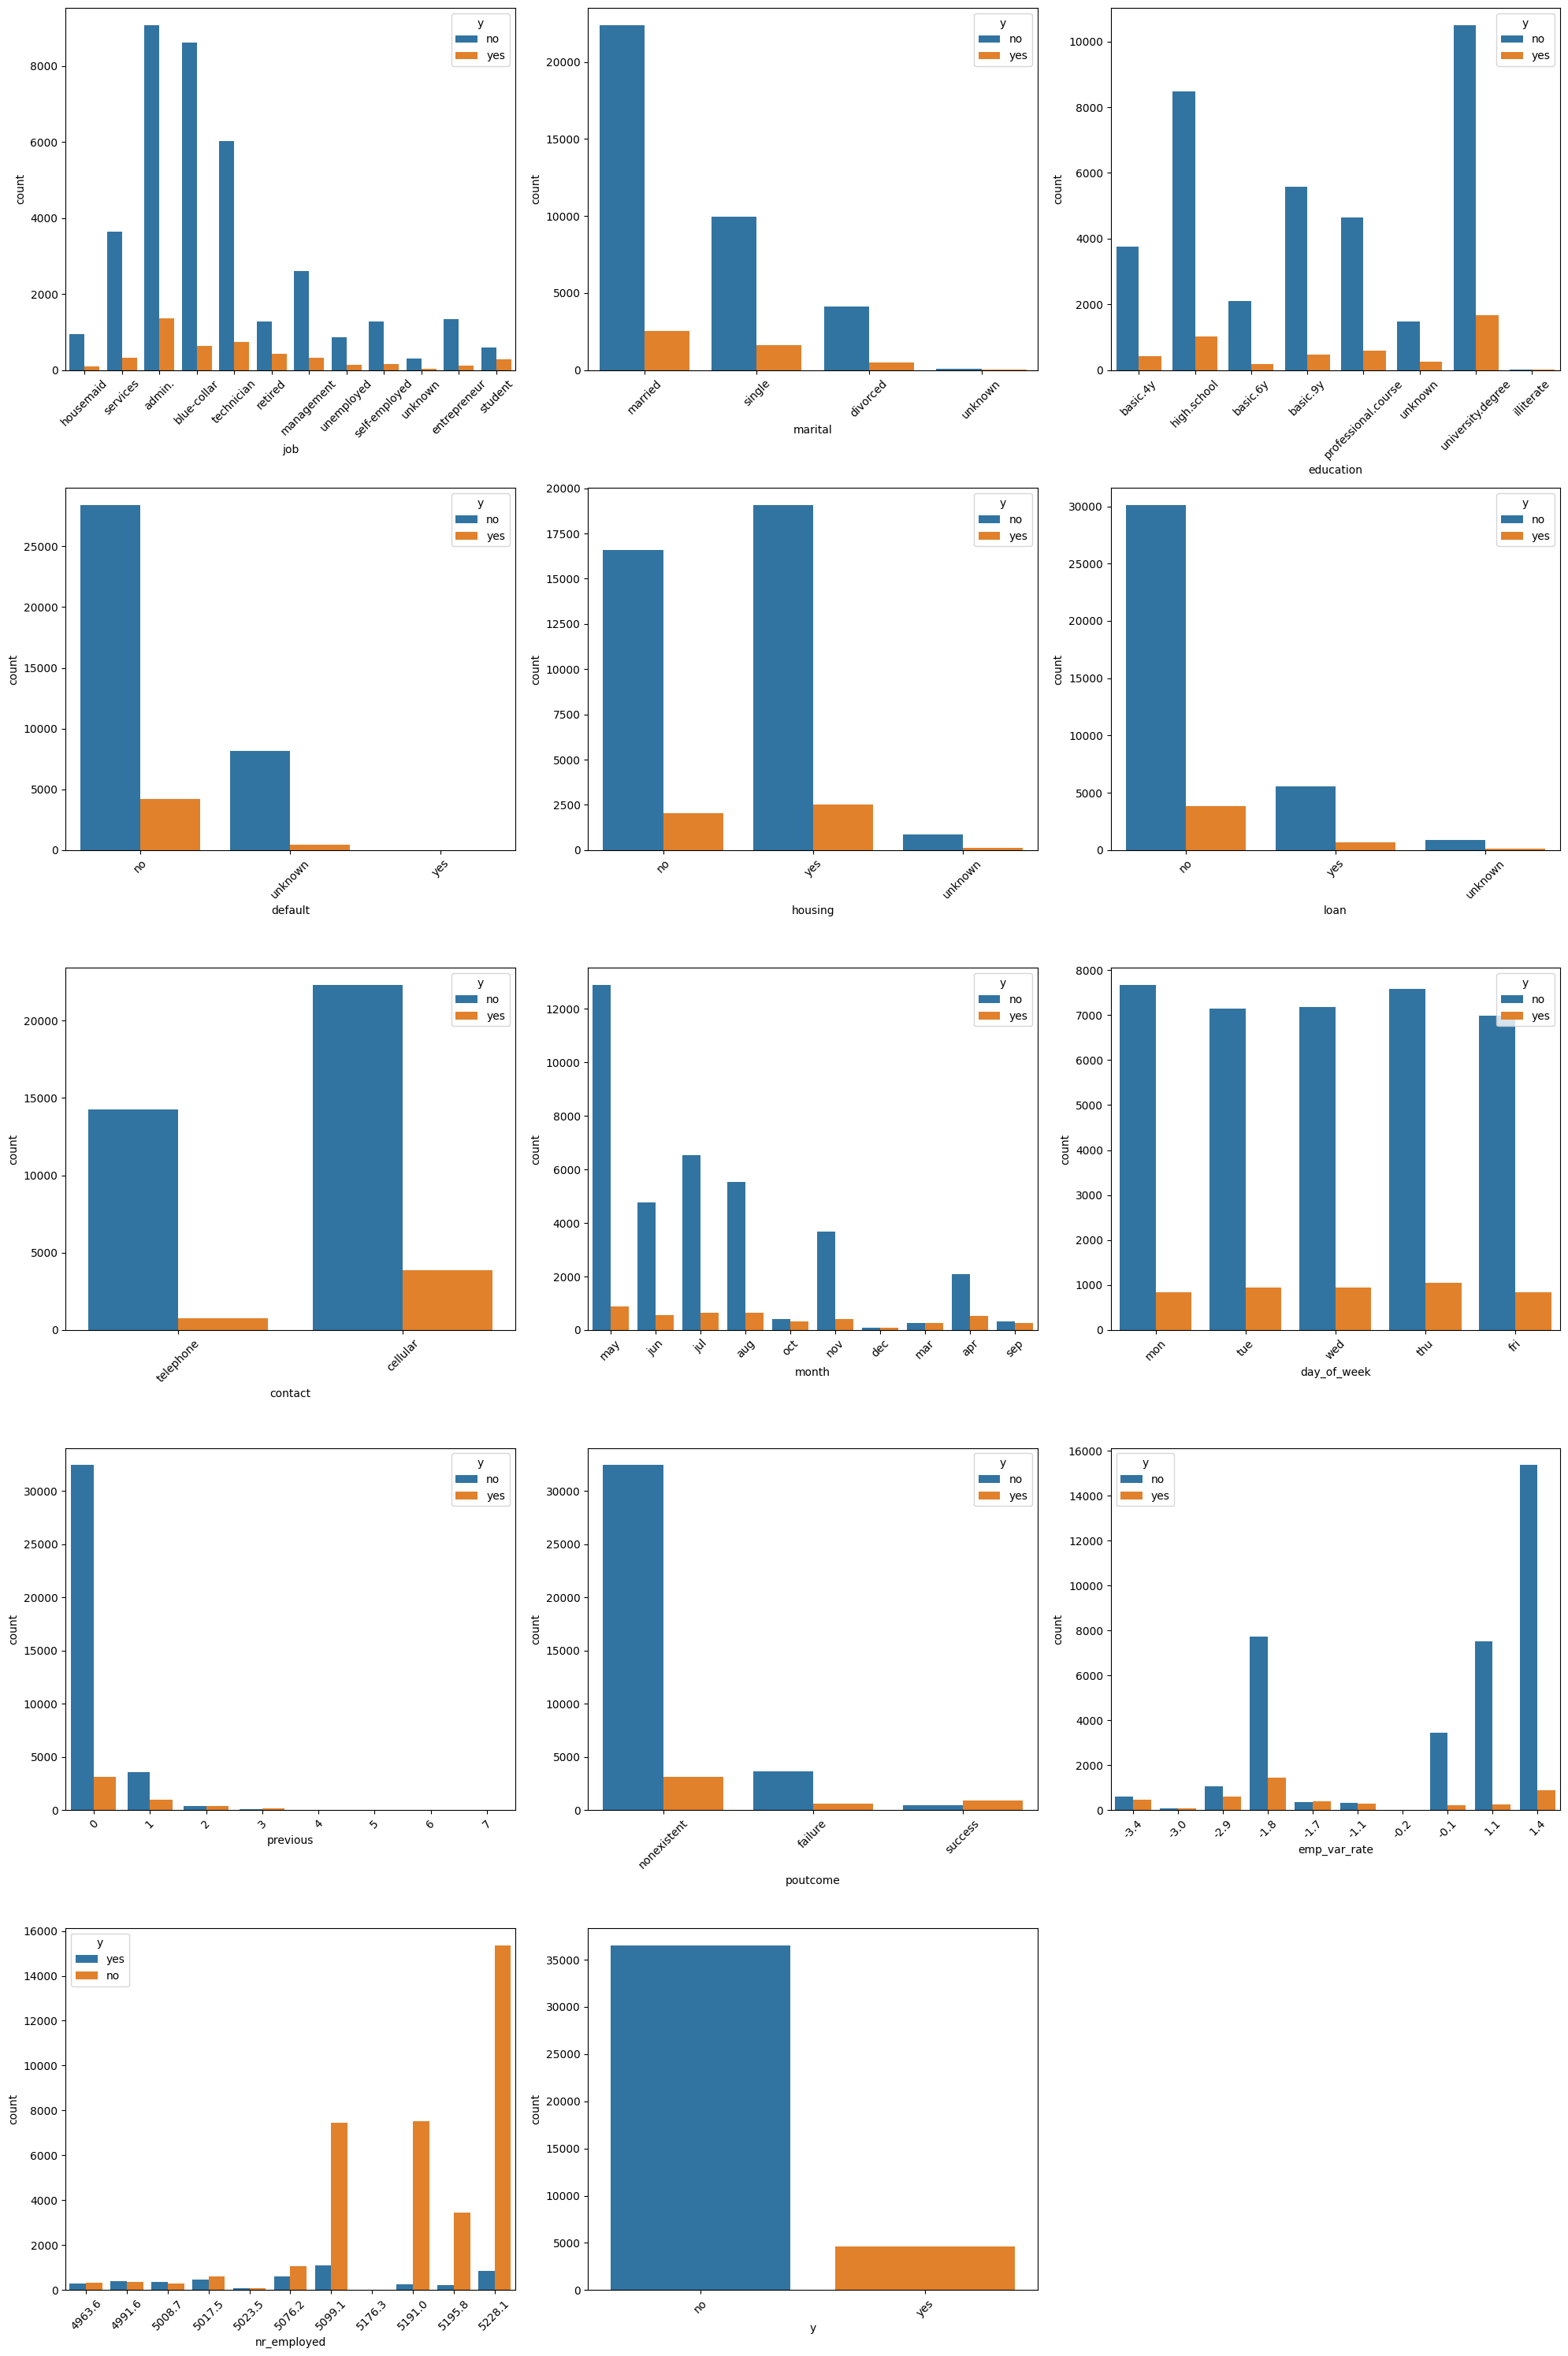

In [ ]:
# Plot countplot between other colums and target columns
plt.figure(figsize=(20,30))
plotnumber = 1
for i in df:
    if len(df[i].unique()) < 20:
      plt.subplot(5,3,plotnumber)
      plt.xticks(rotation = 45)
      sns.countplot(x = df[i], hue=df.y)
      plotnumber += 1

plt.tight_layout()

#INSIGHTS:-

1. Job and Campaign Outcome: The majority of customers who were contacted are in roles like "admin." and "blue-collar". A relatively higher proportion of customers in the "student" and "retired" categories responded positively to the campaign ("yes"). On the other hand, most customers in jobs like "blue-collar" and "entrepreneur" responded negatively ("no").
2.Marital Status and Campaign Outcome: Most contacts were made to married individuals, followed by single and divorced customers. Single individuals had a slightly higher ratio of positive responses ("yes") compared to married or divorced customers, who were more likely to say "no".
3. Education Level: Customers with "university.degree" or "high.school" education were contacted most frequently. Positive responses were more frequent among customers with higher education levels, especially those with a "university.degree".
4. Default Status: Most customers did not have credit in default, and nearly all positive responses came from this group. Very few customers with defaulted credit responded positively, indicating that financial stability plays a role in campaign success.
5. Housing Loan: A large number of customers with a housing loan responded negatively to the campaign. Those without a housing loan had a relatively higher likelihood of responding positively.
6. Personal Loan: The majority of customers did not have a personal loan, and this group had more positive responses compared to those with a personal loan. This could suggest that customers with fewer financial obligations are more likely to subscribe to a term deposit.
7. Contact Type: Most contacts were made via cellular phones, and this method yielded more positive results compared to contacts made via telephone. Customers contacted through "cellular" were more likely to say "yes".
8. Month of Contact: The month of May had the highest number of contacts, but most of these resulted in negative responses. Contacts made in March, September, and December had relatively higher rates of positive outcomes compared to other months.
9. Day of the Week: Contacts made throughout the week showed no significant variation in outcome, with similar proportions of "yes" and "no" responses across different days.
10. Previous Contacts: Most customers had no previous contacts, and these were largely associated with negative responses. However, those who had one or more prior contacts were slightly more likely to respond positively, suggesting that previous engagement increases the chance of success.
11. Outcome of Previous Marketing Campaign: Customers who had a positive outcome in a previous marketing campaign were much more likely to respond positively again in the current campaign. Most negative responses came from customers with no prior campaign contact.
12. Employment Variation Rate: A higher employment variation rate (greater than 1.1) correlated with more positive responses, indicating that customers in periods of economic growth or job market improvement were more receptive to the offer.
13. Campaign Outcome (y): The dataset is highly imbalanced, with the majority of responses being negative ("no"), while only a small portion of customers responded positively ("yes").

In [ ]:
df.y.value_counts()

,count
y,
no,36548
yes,4640


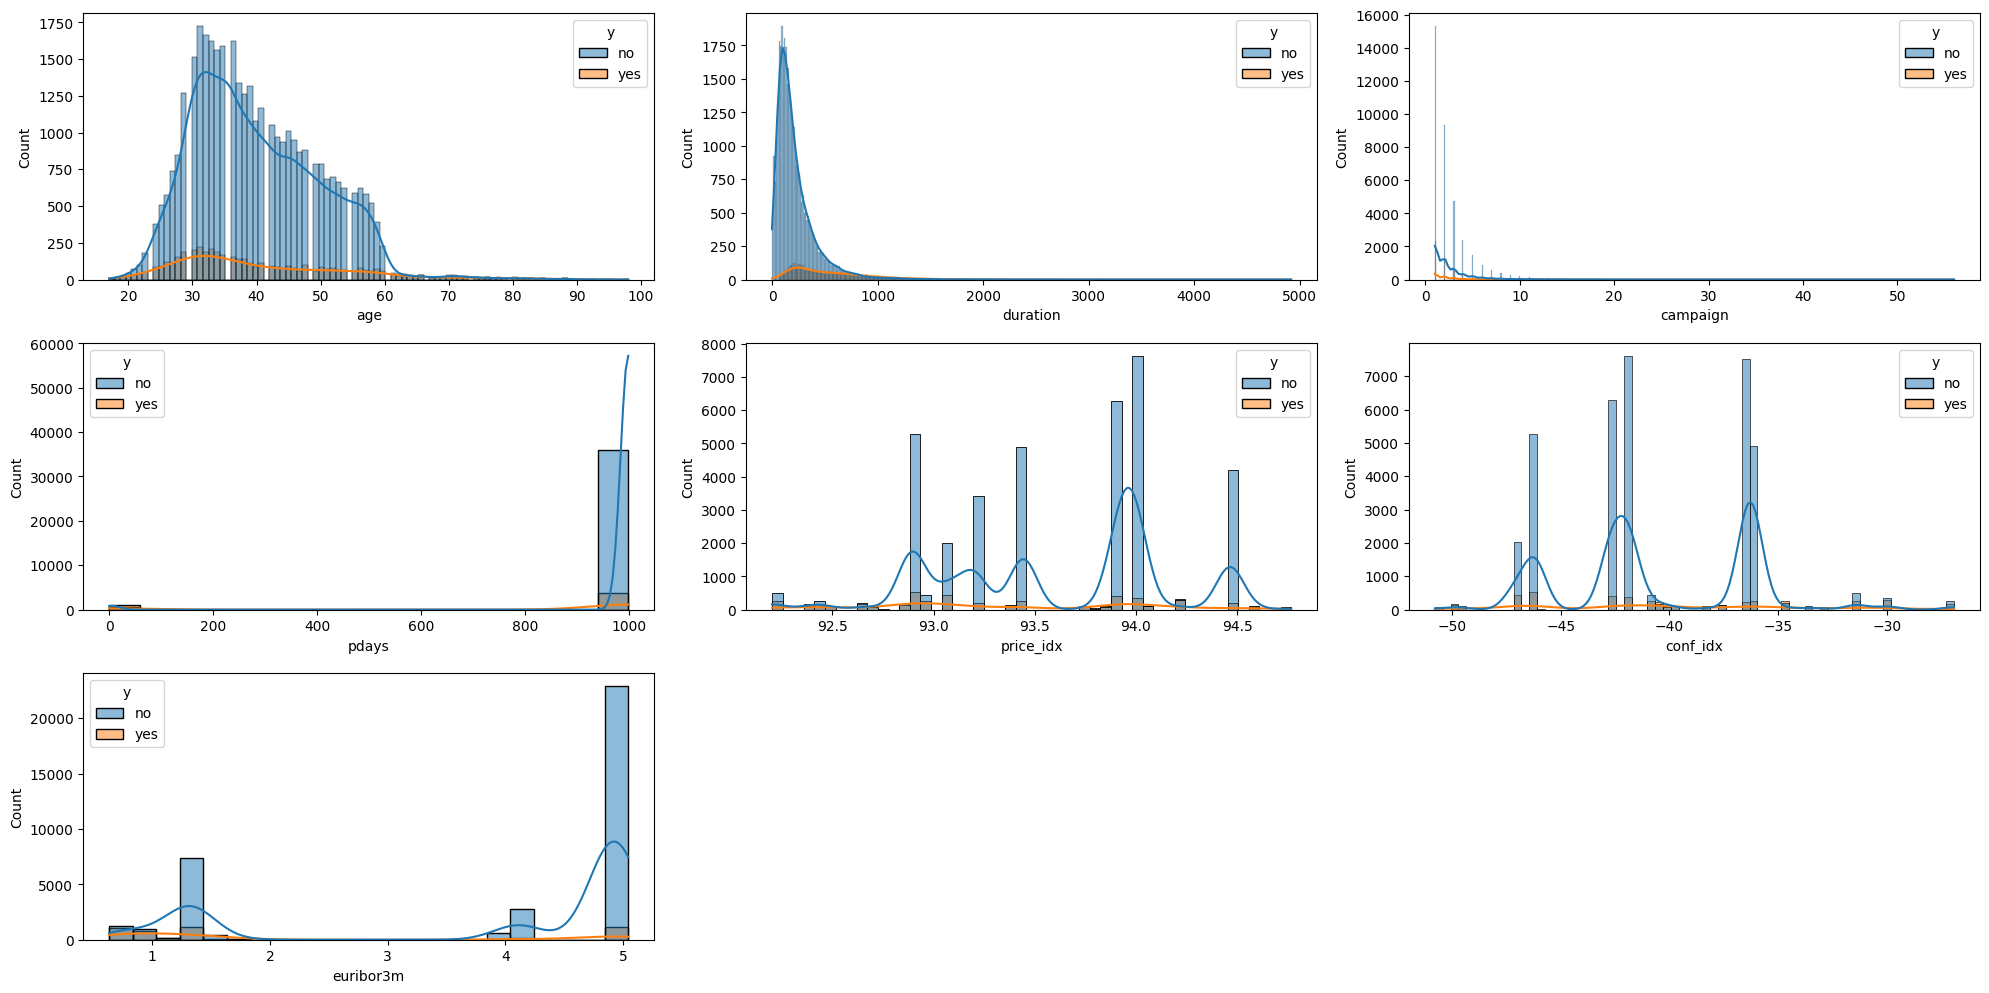

In [ ]:
plt.figure(figsize=(20,10))
plotnumber = 1
for i in df:
  if len(df[i].unique()) > 20 and (df[i].dtype == 'int64' or df[i].dtype == 'float64'):
    plt.subplot(3,3,plotnumber)
    sns.histplot(x = df[i],hue=df.y,kde=True)
    plotnumber += 1

plt.tight_layout()

#INSIGHTS

1. Age: Skewed right; most respondents are between 25-60. Positive responses ("yes") are fewer but consistent across ages.

2. Duration: Highly skewed right; longer call durations strongly correlate with positive outcomes.

3. Campaign: Skewed right; most people contacted fewer times. More contacts don't increase positive responses.

4. Pdays: Strong right skew with most values at 1000, indicating no recent contact and very few positive responses.

5. Price Index: No clear relationship with positive outcomes, but "no" responses dominate across all price ranges.

6. Confidence Index: Peaks at negative values, with "yes" and "no" responses showing little variation.

7. Euribor 3m: Skewed right; higher rates link to fewer positive responses.

# 4.Data Preprocessing

## 4.1 Handling Null Values

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


## 4.2 Handling Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'price_idx', 'conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

## Encoded every categorical column with Label Encoder

In [ ]:
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['day_of_week'] = le.fit_transform(df['day_of_week'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,price_idx,conf_idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Checking Outliners

<Axes: ylabel='age'>

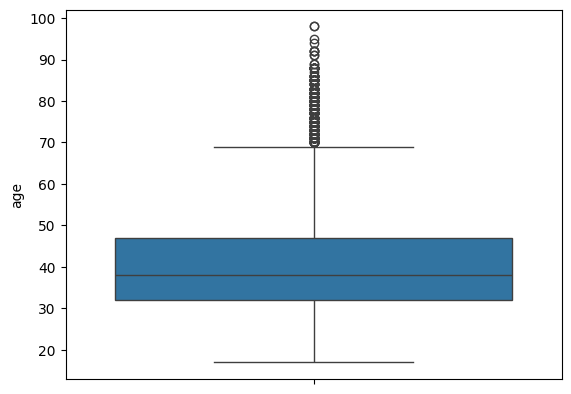

In [ ]:
sns.boxplot(df.age)

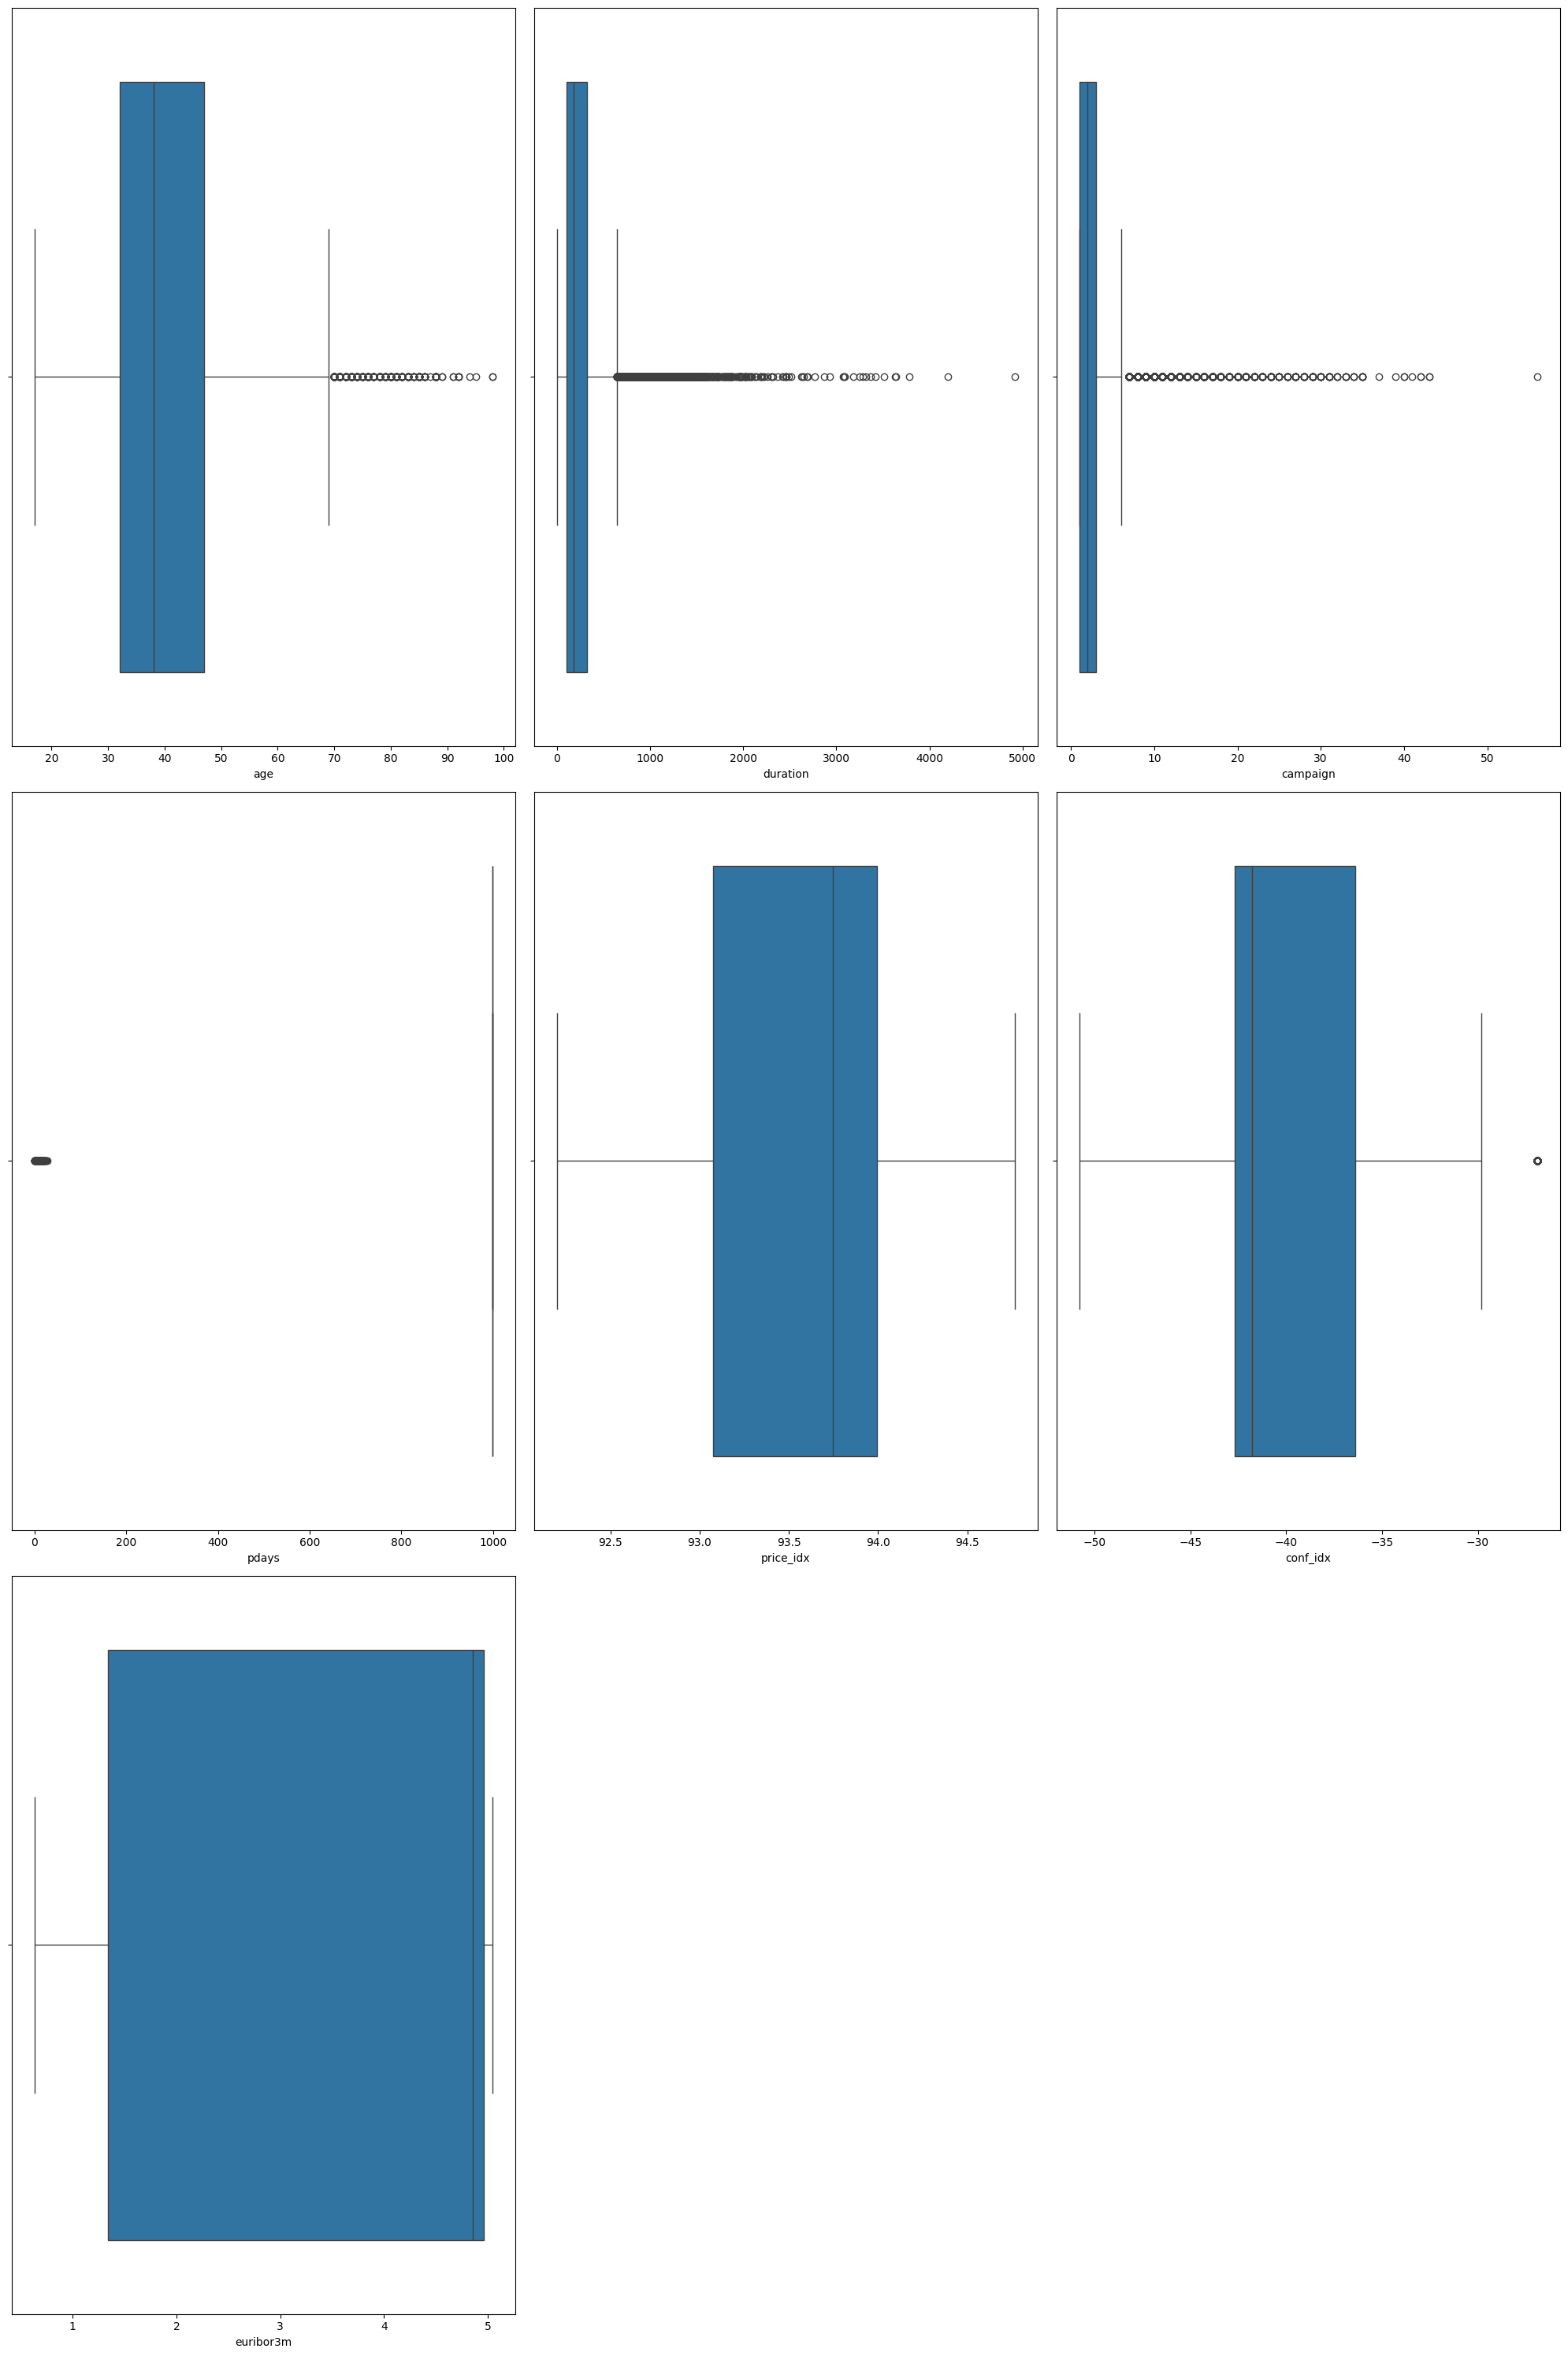

In [ ]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in df:
  if len(df[i].unique()) > 20 and (df[i].dtype == 'int64' or df[i].dtype == 'float64'):
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x = df[i])
    plotnumber += 1

plt.tight_layout()

<Axes: xlabel='conf_idx'>

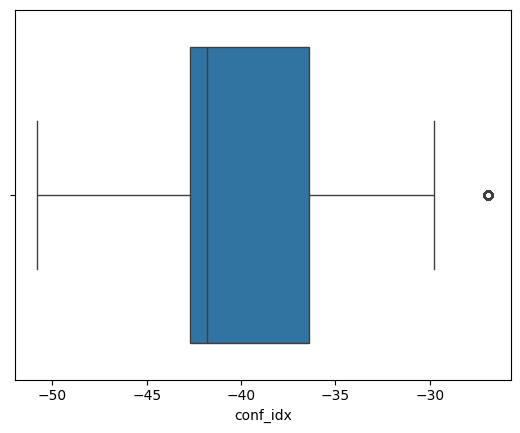

In [ ]:
sns.boxplot(x = df.conf_idx)

# Feature Selection

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,price_idx,conf_idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
df.drop('duration',axis=1,inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,price_idx,conf_idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


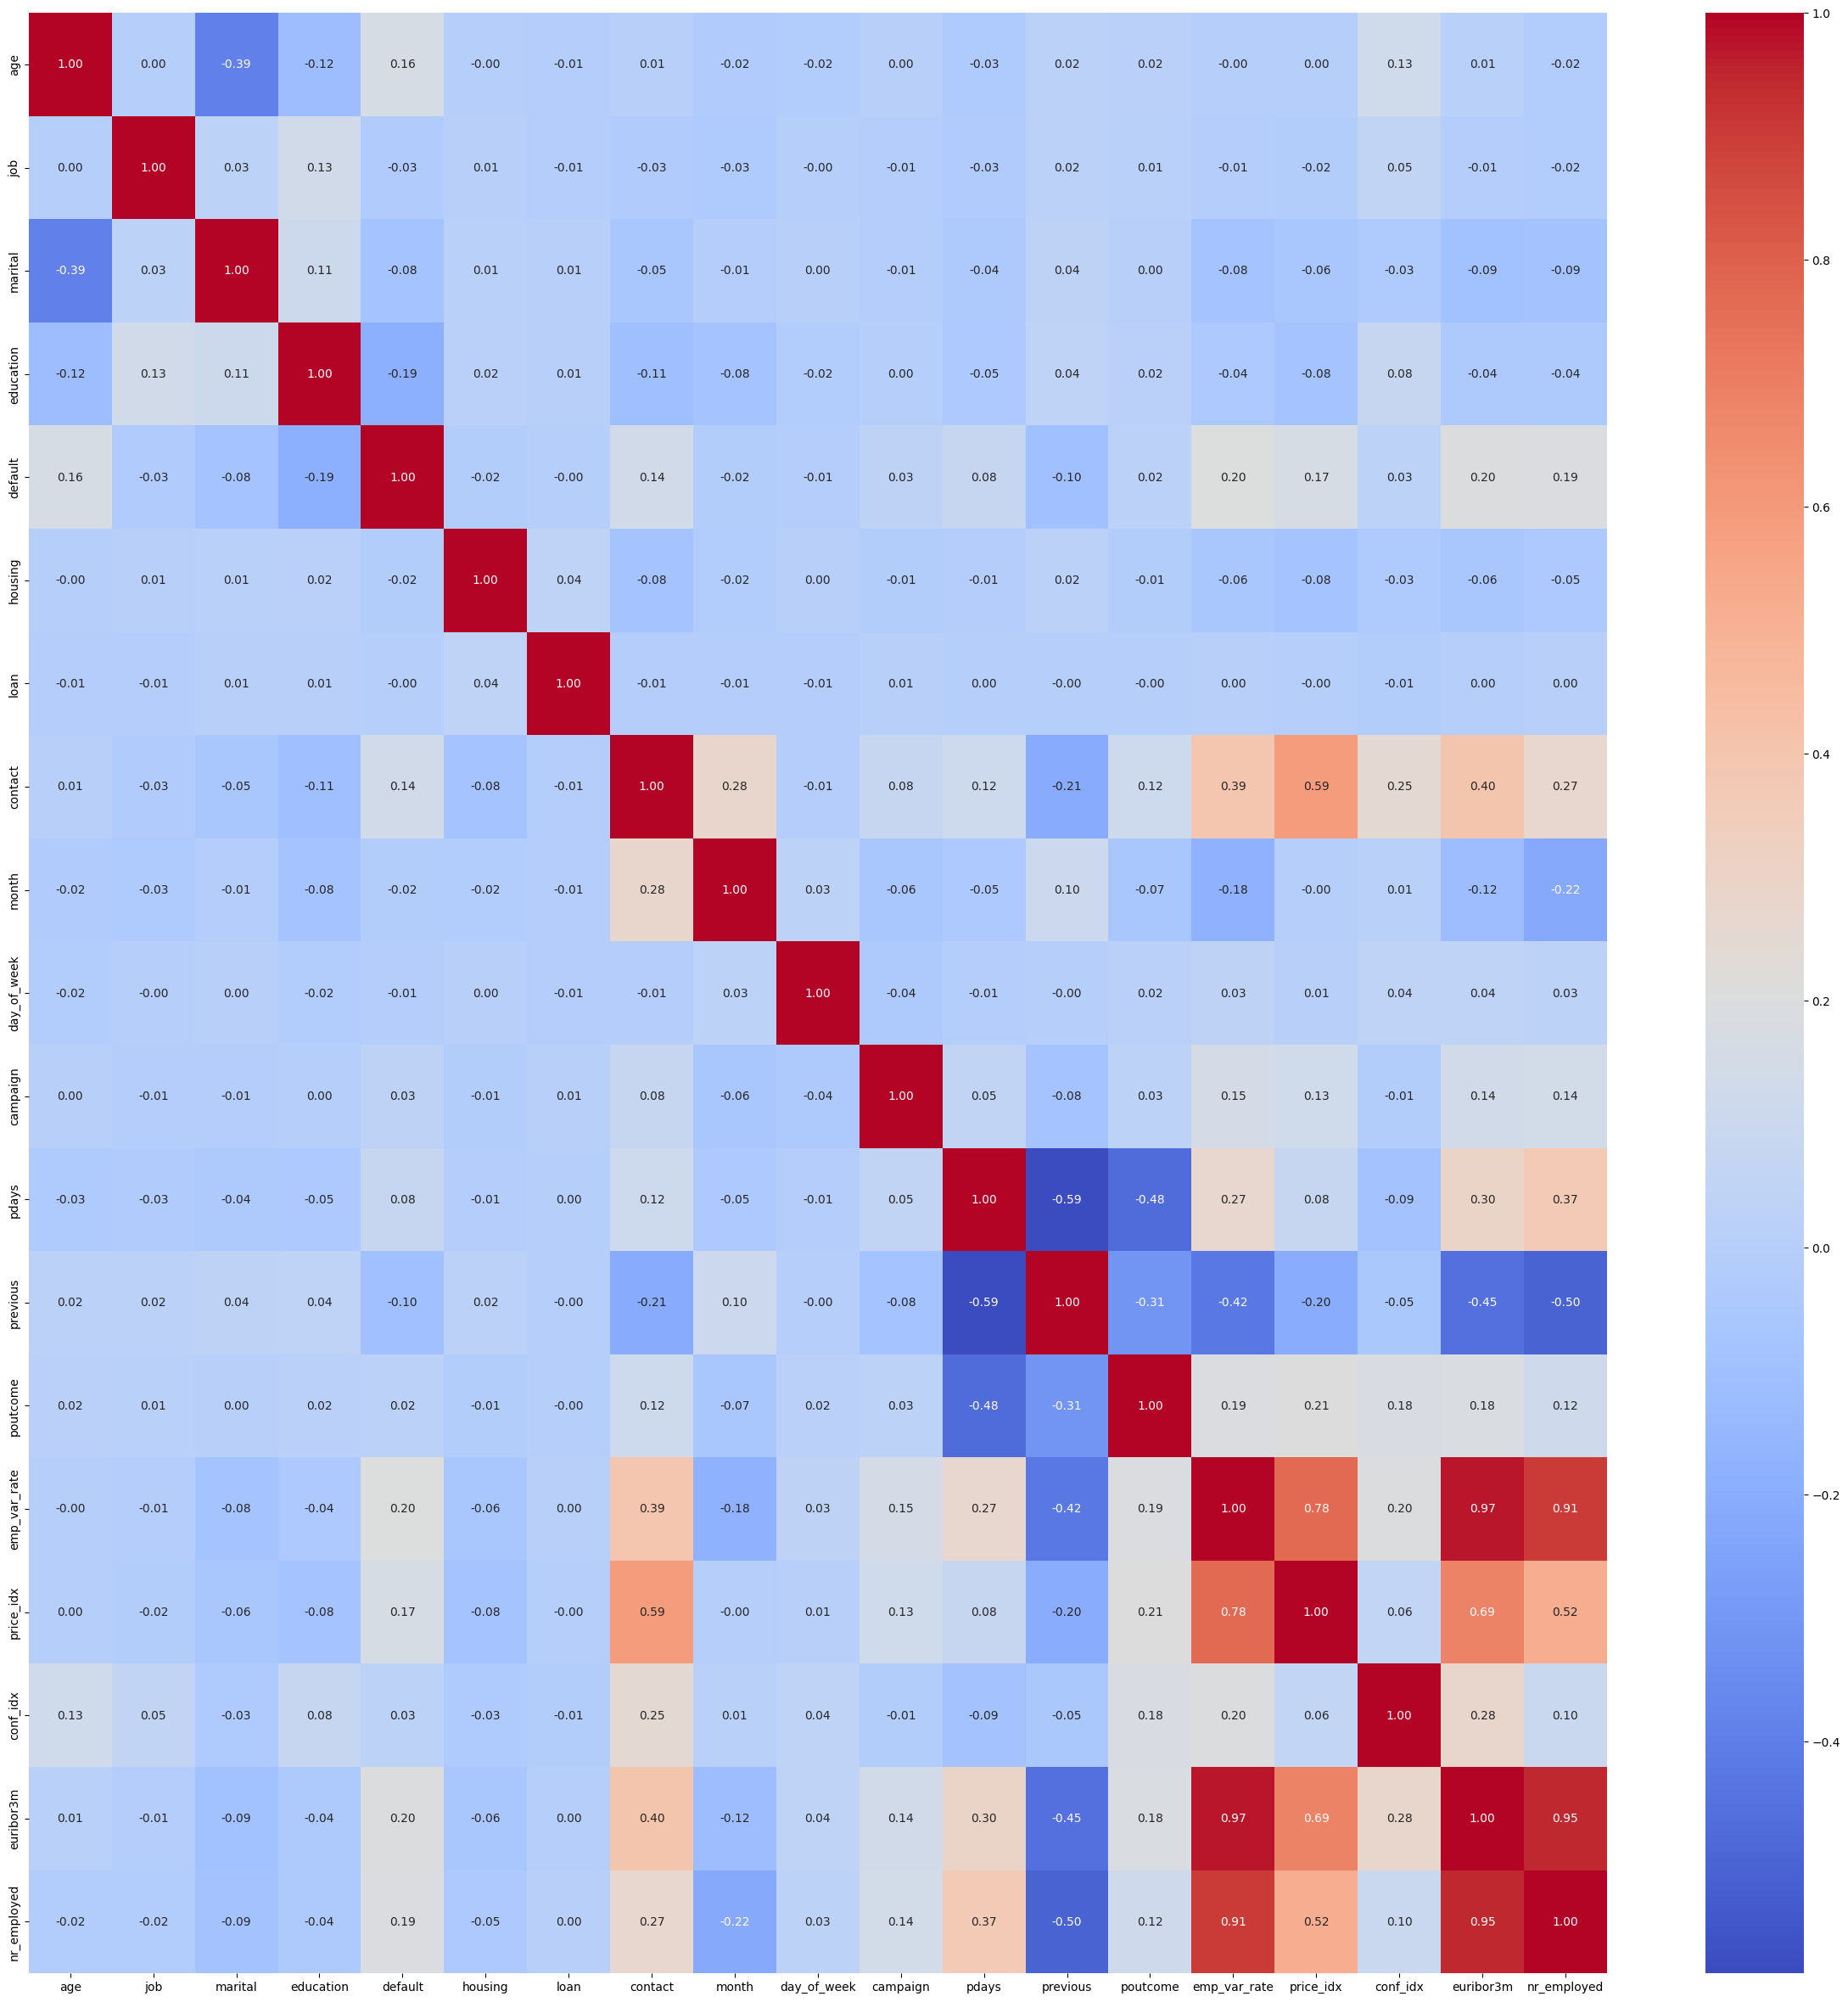

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.drop('y',axis=1).corr(),annot=True, fmt=".2f",cmap='coolwarm',  annot_kws={"size": 10})
plt.show()

In [ ]:
df.drop('y',axis=1).corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,price_idx,conf_idx,euribor3m,nr_employed
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380


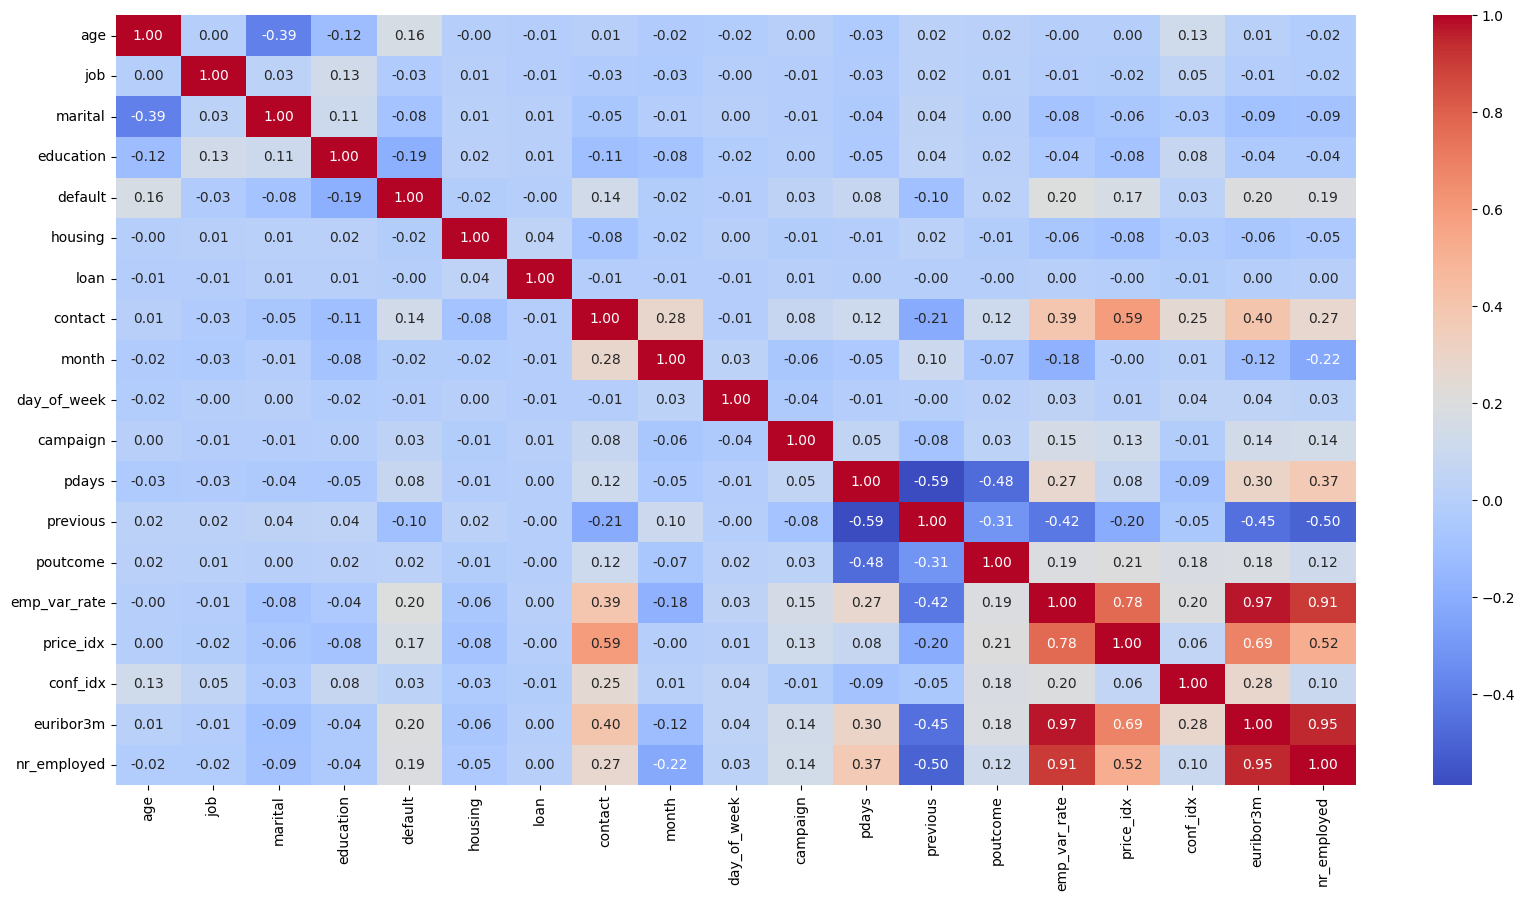

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df.drop('y', axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

plt.show()

# 5. Model Creation

1. Logistic Regression

In [ ]:
x = df.drop('y',axis=1)
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,price_idx,conf_idx,euribor3m,nr_employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
y = df.y
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,price_idx,conf_idx,euribor3m,nr_employed
12556,40,1,1,2,1,2,0,1,3,1,2,999,0,1,1.4,93.918,-42.7,4.960,5228.1
35451,31,0,1,6,0,0,0,0,6,1,4,999,0,1,-1.8,92.893,-46.2,1.244,5099.1
30592,59,5,1,0,0,0,0,0,6,1,6,999,1,0,-1.8,92.893,-46.2,1.354,5099.1
17914,43,3,0,2,0,2,0,0,3,3,5,999,0,1,1.4,93.918,-42.7,4.961,5228.1
3315,39,0,2,3,1,0,0,1,6,2,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,5,1,5,1,0,0,1,6,3,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
11284,37,4,1,6,0,0,0,1,4,2,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
38158,35,0,1,3,0,2,0,0,8,2,1,4,1,2,-3.4,92.431,-26.9,0.754,5017.5
860,40,4,1,6,0,2,0,1,6,4,2,999,0,1,1.1,93.994,-36.4,4.856,5191.0


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 19)
(8238, 19)
(32950,)
(8238,)


## Logistic Regression (Without Balancing)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_train = LR.predict(x_train)
y_pred_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8965768390386016


Accuracy of 89% on test data

In [ ]:
print(accuracy_score(y_train,y_pred_train))

0.9001517450682853


Accuracy of 90 % on train data

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.65      0.19      0.29       935

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [ ]:
result = pd.DataFrame(index=['Accuracy','F1-score'])
result['LR/NO_BAL'] = [accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)]

In [ ]:
result

,LR/NO_BAL
Accuracy,0.896577
F1-score,0.292359


## Balance the Data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [ ]:
y_train.value_counts()

,count
y,
0,29245
1,3705


In [ ]:
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [ ]:
y_sm.value_counts()

,count
y,
0,29245
1,29245


In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 29245, 1: 3705})
Counter({0: 29245, 1: 29245})


In [ ]:
from sklearn.linear_model import LogisticRegression
LR1 = LogisticRegression()

In [ ]:
LR1.fit(x_sm,y_sm)

LogisticRegression()

In [ ]:
y_pred1 = LR1.predict(x_test)
y_pred1

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred1)

0.7568584607914542

In [ ]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      5930
           1       0.66      0.27      0.38      2308

    accuracy                           0.76      8238
   macro avg       0.72      0.61      0.62      8238
weighted avg       0.74      0.76      0.72      8238



In [ ]:
result['LR/SMOTE'] = [accuracy_score(y_test,y_pred1),f1_score(y_test,y_pred1)]

In [ ]:
result

,LR/NO_BAL,LR/SMOTE
Accuracy,0.896577,0.756858
F1-score,0.292359,0.382362


## Balancing Data using Under sampling technique

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
RM = RandomUnderSampler()

In [ ]:
x_rm,y_rm = RM.fit_resample(x_train,y_train)

In [ ]:
print(Counter(y_train))
print(Counter(y_rm))

Counter({0: 29245, 1: 3705})
Counter({0: 3705, 1: 3705})


In [ ]:
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression()

In [ ]:
LR2.fit(x_rm,y_rm)

LogisticRegression()

In [ ]:
y_pred2 = LR2.predict(x_test)
y_pred2

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
print(accuracy_score(y_test,y_pred2))

0.7297887836853605


In [ ]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      5651
           1       0.69      0.25      0.37      2587

    accuracy                           0.73      8238
   macro avg       0.71      0.60      0.60      8238
weighted avg       0.72      0.73      0.68      8238



In [ ]:
result['LR/UN_BAL'] = [accuracy_score(y_test,y_pred2),f1_score(y_test,y_pred2)]

In [ ]:
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL
Accuracy,0.896577,0.756858,0.729789
F1-score,0.292359,0.382362,0.367973


# Model Evaluation Using Logistic Regression Model


### 1.Without Balancing the data (Logistic Regression)

- Accuracy - 90%
- recall Score ['Yes'] - 19%
- F1-score['Yes'] - 29%
- Performed extreamly bad on 'yes' data

### 2. Using SMOTE to Balance data (Logistic Regression)
- accuracy - 77 %
- recall score ['Yes'] - 28 %
- F1-score ['Yes'] - 39 %
- Performed extreamly bad on 'yes' data

### 3. Using Under Sampling technique (Logistic Regresion)
- accuracy - 74%
- recall ['Yes'] - 26%
- F1-score ['Yes'] - 37%
- Performed extreamly bad on 'yes' data


# USE OF SUPPORT VECTOR MACHINE (SVM)

In [ ]:
from sklearn.svm import SVC
sv = SVC()

## Predict Values without Balancing the data

In [ ]:
sv.fit(x_train,y_train)

SVC()

In [ ]:
y_pred_svm = sv.predict(x_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(accuracy_score(y_test,y_pred_svm))

0.8947560087399854


In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.20      0.30       935

    accuracy                           0.89      8238
   macro avg       0.76      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



In [ ]:
result['SVM/NO_BAL'] = [accuracy_score(y_test,y_pred_svm),f1_score(y_test,y_pred_svm)]
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL,SVM/NO_BAL
Accuracy,0.896577,0.756858,0.729789,0.894756
F1-score,0.292359,0.382362,0.367973,0.304731


## Balancing Data using SMOTE (SVM)

In [ ]:
x_sm1,y_sm1 = sm.fit_resample(x_train,y_train)

In [ ]:
print(Counter(y_train))
print(Counter(y_sm1))

Counter({0: 29245, 1: 3705})
Counter({0: 29245, 1: 29245})


In [ ]:
from sklearn.svm import SVC
sv1 = SVC()

In [ ]:
sv1.fit(x_sm1,y_sm1)

SVC()

In [ ]:
y_pred_svm1 = sv1.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred_svm1))

0.7159504734158776


In [ ]:
print(classification_report(y_test,y_pred_svm1))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      7303
           1       0.24      0.71      0.36       935

    accuracy                           0.72      8238
   macro avg       0.60      0.71      0.59      8238
weighted avg       0.87      0.72      0.77      8238



In [ ]:
result['SVM/SMOTE'] = [accuracy_score(y_test,y_pred_svm1),f1_score(y_test,y_pred_svm1)]
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL,SVM/NO_BAL,SVM/SMOTE
Accuracy,0.896577,0.756858,0.729789,0.894756,0.715950
F1-score,0.292359,0.382362,0.367973,0.304731,0.360656


# Model Evaluation Summary (SVM)


### Model Prediction without balancing (SVM)
- Accuracy : 89%
- recall : 20%
- F1-score : 30%

### Model Accuracy using SMOTE (SVM)

- accuracy : 71%
- recall : 71%
- f1-score : 36%

# KNN
## Without Balancing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred_knn)

0.8844379703811605

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7303
           1       0.48      0.27      0.35       935

    accuracy                           0.88      8238
   macro avg       0.70      0.62      0.64      8238
weighted avg       0.86      0.88      0.87      8238



In [ ]:
result['KNN/NO_BAL'] = [accuracy_score(y_test,y_pred_knn),f1_score(y_test,y_pred_knn)]
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL,SVM/NO_BAL,SVM/SMOTE,KNN/NO_BAL
Accuracy,0.896577,0.756858,0.729789,0.894756,0.715950,0.884438
F1-score,0.292359,0.382362,0.367973,0.304731,0.360656,0.348837


## With Balancing

In [ ]:
knn1 = KNeighborsClassifier()

In [ ]:
knn1.fit(x_sm,y_sm)

KNeighborsClassifier()

In [ ]:
y_pred_knnB = knn1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_knnB)

0.7478756979849478

In [ ]:
print(classification_report(y_test,y_pred_knnB))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      7303
           1       0.24      0.58      0.34       935

    accuracy                           0.75      8238
   macro avg       0.59      0.67      0.59      8238
weighted avg       0.86      0.75      0.79      8238



In [ ]:
result['KNN/SMOTE'] = [accuracy_score(y_test,y_pred_knnB),f1_score(y_test,y_pred_knnB)]
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL,SVM/NO_BAL,SVM/SMOTE,KNN/NO_BAL,KNN/SMOTE
Accuracy,0.896577,0.756858,0.729789,0.894756,0.715950,0.884438,0.747876
F1-score,0.292359,0.382362,0.367973,0.304731,0.360656,0.348837,0.341680


## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
model_bag = BaggingClassifier(estimator=LR,n_estimators=50)

model_bag.fit(x_sm,y_sm)
y_pred_bag = model_bag.predict(x_test)

In [ ]:
acc = accuracy_score(y_test,y_pred_bag)
f1 = f1_score(y_test,y_pred_bag)
print(classification_report(y_test,y_pred_bag))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7303
           1       0.28      0.63      0.39       935

    accuracy                           0.77      8238
   macro avg       0.61      0.71      0.62      8238
weighted avg       0.87      0.77      0.81      8238



In [ ]:
result['LR/BAG'] = [acc,f1]

In [ ]:
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL,SVM/NO_BAL,SVM/SMOTE,KNN/NO_BAL,KNN/SMOTE,LR/BAG
Accuracy,0.896577,0.756858,0.729789,0.894756,0.715950,0.884438,0.747876,0.773610
F1-score,0.292359,0.382362,0.367973,0.304731,0.360656,0.348837,0.341680,0.388324


## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(x_sm,y_sm)
y_pred_gbm = gbm.predict(x_test)

In [ ]:
acc = accuracy_score(y_test,y_pred_gbm)
f1 = f1_score(y_test,y_pred_gbm)
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7303
           1       0.34      0.52      0.41       935

    accuracy                           0.83      8238
   macro avg       0.64      0.69      0.66      8238
weighted avg       0.87      0.83      0.85      8238



In [ ]:
result['GB/SMOTE'] = [acc,f1]

In [ ]:
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL,SVM/NO_BAL,SVM/SMOTE,KNN/NO_BAL,KNN/SMOTE,LR/BAG,GB/SMOTE
Accuracy,0.896577,0.756858,0.729789,0.894756,0.715950,0.884438,0.747876,0.773610,0.832605
F1-score,0.292359,0.382362,0.367973,0.304731,0.360656,0.348837,0.341680,0.388324,0.411438


In [ ]:
gbm

GradientBoostingClassifier()

In [ ]:
# Hyperparameter tuning for GradientBoost
# Importing RandomizedSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'learning_rate':[0.01,0.03,0.06,0.1,0.4,0.5,0.6,0.7],
    'max_depth' : [5,6,7,9,10],
    'n_estimators' : [50,65,80,100]
}

GB = GradientBoostingClassifier()

rcv = RandomizedSearchCV(estimator=GB,scoring='f1',refit=True,param_distributions=param_grid,cv=5,verbose=2,n_jobs=-1)

rcv.fit(x_sm,y_sm)
rcv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.6}

In [ ]:
GB2 = GradientBoostingClassifier(n_estimators=100,max_depth=9,learning_rate=0.6)
GB2.fit(x_sm,y_sm)
y_pred_gbm2 = GB2.predict(x_test)

In [ ]:
acc = accuracy_score(y_test,y_pred_gbm2)
f1 = f1_score(y_test,y_pred_gbm2)
print(classification_report(y_test,y_pred_gbm2))
print(confusion_matrix(y_test,y_pred_gbm2))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7303
           1       0.41      0.37      0.38       935

    accuracy                           0.87      8238
   macro avg       0.66      0.65      0.66      8238
weighted avg       0.86      0.87      0.86      8238

[[6802  501]
 [ 593  342]]


In [ ]:
result['GB/HPT'] = [acc,f1]
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL,SVM/NO_BAL,SVM/SMOTE,KNN/NO_BAL,KNN/SMOTE,LR/BAG,GB/SMOTE,GB/HPT
Accuracy,0.896577,0.756858,0.729789,0.894756,0.715950,0.884438,0.747876,0.773610,0.832605,0.867201
F1-score,0.292359,0.382362,0.367973,0.304731,0.360656,0.348837,0.341680,0.388324,0.411438,0.384702


## XG Boosting

### Without Balancing

In [ ]:
from xgboost import XGBClassifier
xgb_r = XGBClassifier()
xgb_r.fit(x_train,y_train)
y_pred_xgb = xgb_r.predict(x_test)

In [ ]:
acc = accuracy_score(y_test,y_pred_xgb)
f1 = f1_score(y_test,y_pred_xgb)
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.58      0.29      0.39       935

    accuracy                           0.90      8238
   macro avg       0.75      0.63      0.66      8238
weighted avg       0.88      0.90      0.88      8238

[[7107  196]
 [ 664  271]]


In [ ]:
result['XGB/NO_BAL'] = [acc,f1]
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL,SVM/NO_BAL,SVM/SMOTE,KNN/NO_BAL,KNN/SMOTE,LR/BAG,GB/SMOTE,GB/HPT,XGB/NO_BAL
Accuracy,0.896577,0.756858,0.729789,0.894756,0.715950,0.884438,0.747876,0.773610,0.832605,0.867201,0.895606
F1-score,0.292359,0.382362,0.367973,0.304731,0.360656,0.348837,0.341680,0.388324,0.411438,0.384702,0.386591


## Using Balancing

In [ ]:
xgb_r1 = XGBClassifier()
xgb_r1.fit(x_sm,y_sm)
y_pred_xgb1 = xgb_r1.predict(x_test)

In [ ]:
acc = accuracy_score(y_test,y_pred_xgb1)
print(accuracy_score(y_test,y_pred_xgb1))
f1 = f1_score(y_test,y_pred_xgb1)
print(classification_report(y_test,y_pred_xgb1))
print(confusion_matrix(y_test,y_pred_xgb1))

0.8738771546491867
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7303
           1       0.44      0.42      0.43       935

    accuracy                           0.87      8238
   macro avg       0.68      0.68      0.68      8238
weighted avg       0.87      0.87      0.87      8238

[[6807  496]
 [ 543  392]]


In [ ]:
result['XGB/SMOTE'] = [acc,f1]
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL,SVM/NO_BAL,SVM/SMOTE,KNN/NO_BAL,KNN/SMOTE,LR/BAG,GB/SMOTE,GB/HPT,XGB/NO_BAL,XGB/SMOTE
Accuracy,0.896577,0.756858,0.729789,0.894756,0.715950,0.884438,0.747876,0.773610,0.832605,0.867201,0.895606,0.873877
F1-score,0.292359,0.382362,0.367973,0.304731,0.360656,0.348837,0.341680,0.388324,0.411438,0.384702,0.386591,0.430060


### Hyperparameter tuning
### Without balancing

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [ ]:
XGB = XGBClassifier(random_state=42,verbosity=0,silent=0)

In [ ]:
rcv = RandomizedSearchCV(estimator=XGB,scoring='accuracy',param_distributions=param_grid,n_iter=100, cv = 5 , verbose= 2, random_state=42, n_jobs=-1)

In [ ]:
rcv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
rcv.best_params_

{'reg_lambda': 0.2,
 'reg_alpha': 0.8,
 'n_estimators': 65,
 'max_depth': 5,
 'learning_rate': 0.06,
 'gamma': 0.8}

In [ ]:
XGB2 = XGBClassifier(reg_lambda= 0.2,reg_alpha= 0.8,n_estimators= 65,max_depth= 5,learning_rate= 0.06,gamma= 0.8)

In [ ]:
XGB2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.8, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.06, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=65,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_predict_xbhpt = XGB2.predict(x_test)

In [ ]:
acc = accuracy_score(y_test,y_predict_xbhpt)
f1 = f1_score(y_test,y_predict_xbhpt)
print(classification_report(y_test,y_predict_xbhpt))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.64      0.23      0.34       935

    accuracy                           0.90      8238
   macro avg       0.77      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



In [ ]:
result ['XGB/HPT'] = [acc,f1]
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL,SVM/NO_BAL,SVM/SMOTE,KNN/NO_BAL,KNN/SMOTE,LR/BAG,GB/SMOTE,GB/HPT,XGB/NO_BAL,XGB/SMOTE,XGB/HPT
Accuracy,0.896577,0.756858,0.729789,0.894756,0.715950,0.884438,0.747876,0.773610,0.832605,0.867201,0.895606,0.873877,0.897791
F1-score,0.292359,0.382362,0.367973,0.304731,0.360656,0.348837,0.341680,0.388324,0.411438,0.384702,0.386591,0.430060,0.340125


### Hyperparameter tuning
### Balancing Data

In [ ]:
rcv1 = RandomizedSearchCV(estimator=XGB,scoring='accuracy',param_distributions=param_grid,n_iter=100, cv = 5 , verbose= 2, random_state=42, n_jobs=-1)

In [ ]:
rcv1.fit(x_sm,y_sm)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
rcv1.best_params_

{'reg_lambda': 0.2,
 'reg_alpha': 0.4,
 'n_estimators': 115,
 'max_depth': 12,
 'learning_rate': 0.2,
 'gamma': 0}

In [ ]:
XGB2 = XGBClassifier(reg_lambda= 0.2,reg_alpha= 0.4,n_estimators= 115,max_depth= 12,learning_rate= 0.2,gamma= 0)

In [ ]:
XGB2.fit(x_sm,y_sm)
y_pred_xgbhpt1 = XGB2.predict(x_test)

In [ ]:
acc = accuracy_score(y_test,y_pred_xgbhpt1)
print(accuracy_score(y_test,y_pred_xgbhpt1))
f1 = f1_score(y_test,y_pred_xgbhpt1)
print(classification_report(y_test,y_pred_xgbhpt1))

0.8718135469774217
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7303
           1       0.42      0.36      0.39       935

    accuracy                           0.87      8238
   macro avg       0.67      0.65      0.66      8238
weighted avg       0.86      0.87      0.87      8238



In [ ]:
result['XGB/SMOTE_HPT'] = [acc,f1]
result

,LR/NO_BAL,LR/SMOTE,LR/UN_BAL,SVM/NO_BAL,SVM/SMOTE,KNN/NO_BAL,KNN/SMOTE,LR/BAG,GB/SMOTE,GB/HPT,XGB/NO_BAL,XGB/SMOTE,XGB/HPT,XGB/SMOTE_HPT
Accuracy,0.896577,0.756858,0.729789,0.894756,0.715950,0.884438,0.747876,0.773610,0.832605,0.867201,0.895606,0.873877,0.897791,0.871814
F1-score,0.292359,0.382362,0.367973,0.304731,0.360656,0.348837,0.341680,0.388324,0.411438,0.384702,0.386591,0.430060,0.340125,0.388889


# Model Performance Summary
### Logistic Regression
  - Without balancing, Logistic Regression achieved 90% accuracy with strong majority class performance (F1 = 0.94) but very low minority recall (19%) and F1-score (0.29). Balancing improved minority recall to 27% (F1 = 0.38) but dropped accuracy to 76%, while under-sampling increased minority recall to 25% (F1 = 0.37) at the cost of reducing accuracy to 73%.

### Support Vector Machine (SVM)
  - Without balancing, SVM scored 89% accuracy and majority class F1 of 0.94 but minority class F1 of only 0.30 (recall = 20%). Using SMOTE boosted minority recall to 71% (F1 = 0.36) but accuracy dropped sharply to 72%, showing a strong precision–recall trade-off.

### K-Nearest Neighbour (KNN)
  - Without balancing, KNN achieved 88% accuracy with majority class F1 of 0.94 and minority F1 of 0.35 (recall = 27%). With balancing, minority recall rose to 58% (F1 = 0.34), but accuracy fell to 75%, reflecting the usual trade-off between class balance and overall accuracy.

### Bagging (Logistic Regression base)
 - Bagging with Logistic Regression produced 77% accuracy, achieving minority recall of 63% (F1 = 0.39) and majority class F1 of 0.86. This method improved minority detection compared to plain Logistic Regression without balancing, though overall accuracy was lower.

### Gradient Boosting
  - Using SMOTE, Gradient Boosting reached 83% accuracy with minority recall of 52% (F1 = 0.41) and solid majority class performance (F1 = 0.90). With hyperparameter tuning plus SMOTE, accuracy improved to 87%, but minority recall dropped to 37% (F1 = 0.38), suggesting a trade-off between precision and recall after tuning.

### XGBoost
  - Without balancing, XGBoost achieved 90% accuracy with minority precision of 0.64 but recall only 23% (F1 = 0.34). Balancing increased minority recall to 42% (F1 = 0.43) but reduced accuracy to 87%. Hyperparameter tuning without balancing slightly improved accuracy to 90%, but minority recall fell further to 29% (F1 = 0.39). With both balancing and tuning, accuracy remained at 87%, and minority recall was 36% (F1 = 0.39), indicating tuning helped precision but not recall.

# Conclusion
  - Among all tested models, XGBoost with class balancing achieved the highest F1-score for the minority class (0.43) and the highest macro F1-score (0.68) while maintaining a strong overall accuracy of 87%. Since the dataset is imbalanced, priority was given to improving recall and precision for the minority class without significantly sacrificing performance on the majority class. This balance makes the model more reliable for real-world deployment, where detecting minority cases is critical.

# Recommendations
1. Optimizing Campaign Timing When executing a marketing strategy, it's essential to account for external factors like the timing of customer outreach. Previous analysis shows that March, September, October, and December had the highest success rates. However, to ensure this pattern remains consistent, further data collection and analysis are necessary. If this trend continues, the bank should consider focusing its telemarketing efforts during the fall and spring seasons to maximize impact

2. Enhancing Marketing Strategy Targeting the most relevant customers will lead to higher positive response rates, and over time, this will help classification algorithms correct any imbalances in the original dataset. This process will provide the bank with more reliable insights to improve subscription rates. Additionally, the content and structure of the current campaign should be re-evaluated to ensure it is more attractive and engaging for the target audience, boosting the likelihood of subscription.

3. Improving Service Offerings By gaining a deeper understanding of its customer base, the bank can offer more personalized and timely services. Factors such as marital status and occupation help gauge a customer's life stage, while loan status can reflect their financial risk profile. Using this information, the bank can anticipate when a customer might be interested in making an investment, allowing them to provide the right service at the right moment to meet customer needs more effectively.

## Challenges faced
1. Class Imbalance – The dataset had a significant imbalance between customers who subscribed to the term deposit and those who did not. This could bias the model towards predicting the majority class.
- Solution: Applied techniques like SMOTE, under-sampling, and class weighting to handle the imbalance and improve minority class recall.
2. Categorical Variables – Several features like job, marital status, and education were categorical and required preprocessing for model compatibility.
- Solution: Used one-hot encoding to transform categorical variables into numerical format without losing information.
3. High Cardinality and Irrelevant Features – Some variables like duration were highly correlated with the target but unusable for real prediction since they are known only after the call.
- Solution: Dropped duration from the predictive modeling phase to ensure realistic deployment scenarios.
4. Hyperparameter Tuning Complexity – Tuning tree-based and boosting models with RandomizedSearchCV took significant time due to large parameter grids and dataset size.
- Solution: Used RandomizedSearchCV instead of GridSearchCV to reduce computation time, and leveraged early stopping in boosting algorithms to prevent overfitting.